# TOYOTA COROLLA: 

### Consider only the below columns and prepare a prediction model for predicting Price.

#### Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

?????predicting price is the target column and it is continuos numerical data

In [7]:
#using encoding method to decode the data
toyota = pd.read_excel('ToyotaCorolla.xlsx')
toyota.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [8]:
toyota.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,...,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.277855
std,416.476890,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,...,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.448098
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,721.500000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1081.250000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [10]:
toyota.shape

(1436, 38)

In [11]:
toyota.isna().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [12]:
Corolla = toyota[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

In [13]:
Corolla

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [14]:
Corolla.shape

(1436, 9)

In [15]:
Corolla.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [16]:
Corolla.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


In [17]:
Corolla1=Corolla.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis=1)
Corolla1

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [18]:
#checking whether there are any duplicate values
Corolla1[Corolla1.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [19]:
#dropping the duplicate value
toycor=Corolla1.drop_duplicates().reset_index(drop=True)
toycor

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [20]:
toycor[toycor.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight


No duplicate values.

In [21]:
#to get the discriptive statistics
toycor.describe()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


# Correlation Matrix

In [22]:
toycor.corr()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
CC,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QT,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


<Axes: >

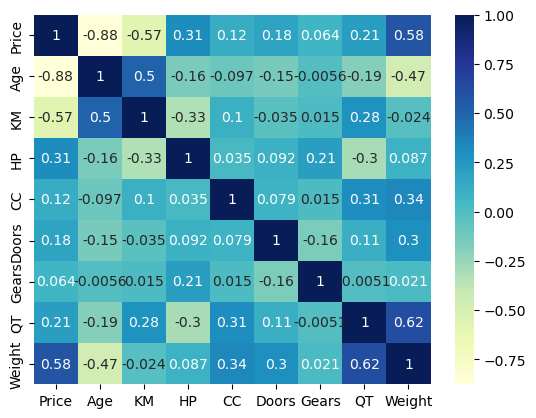

In [23]:
sns.heatmap(toycor.corr(),annot=True, cmap='YlGnBu')

# Scatterplot between variables

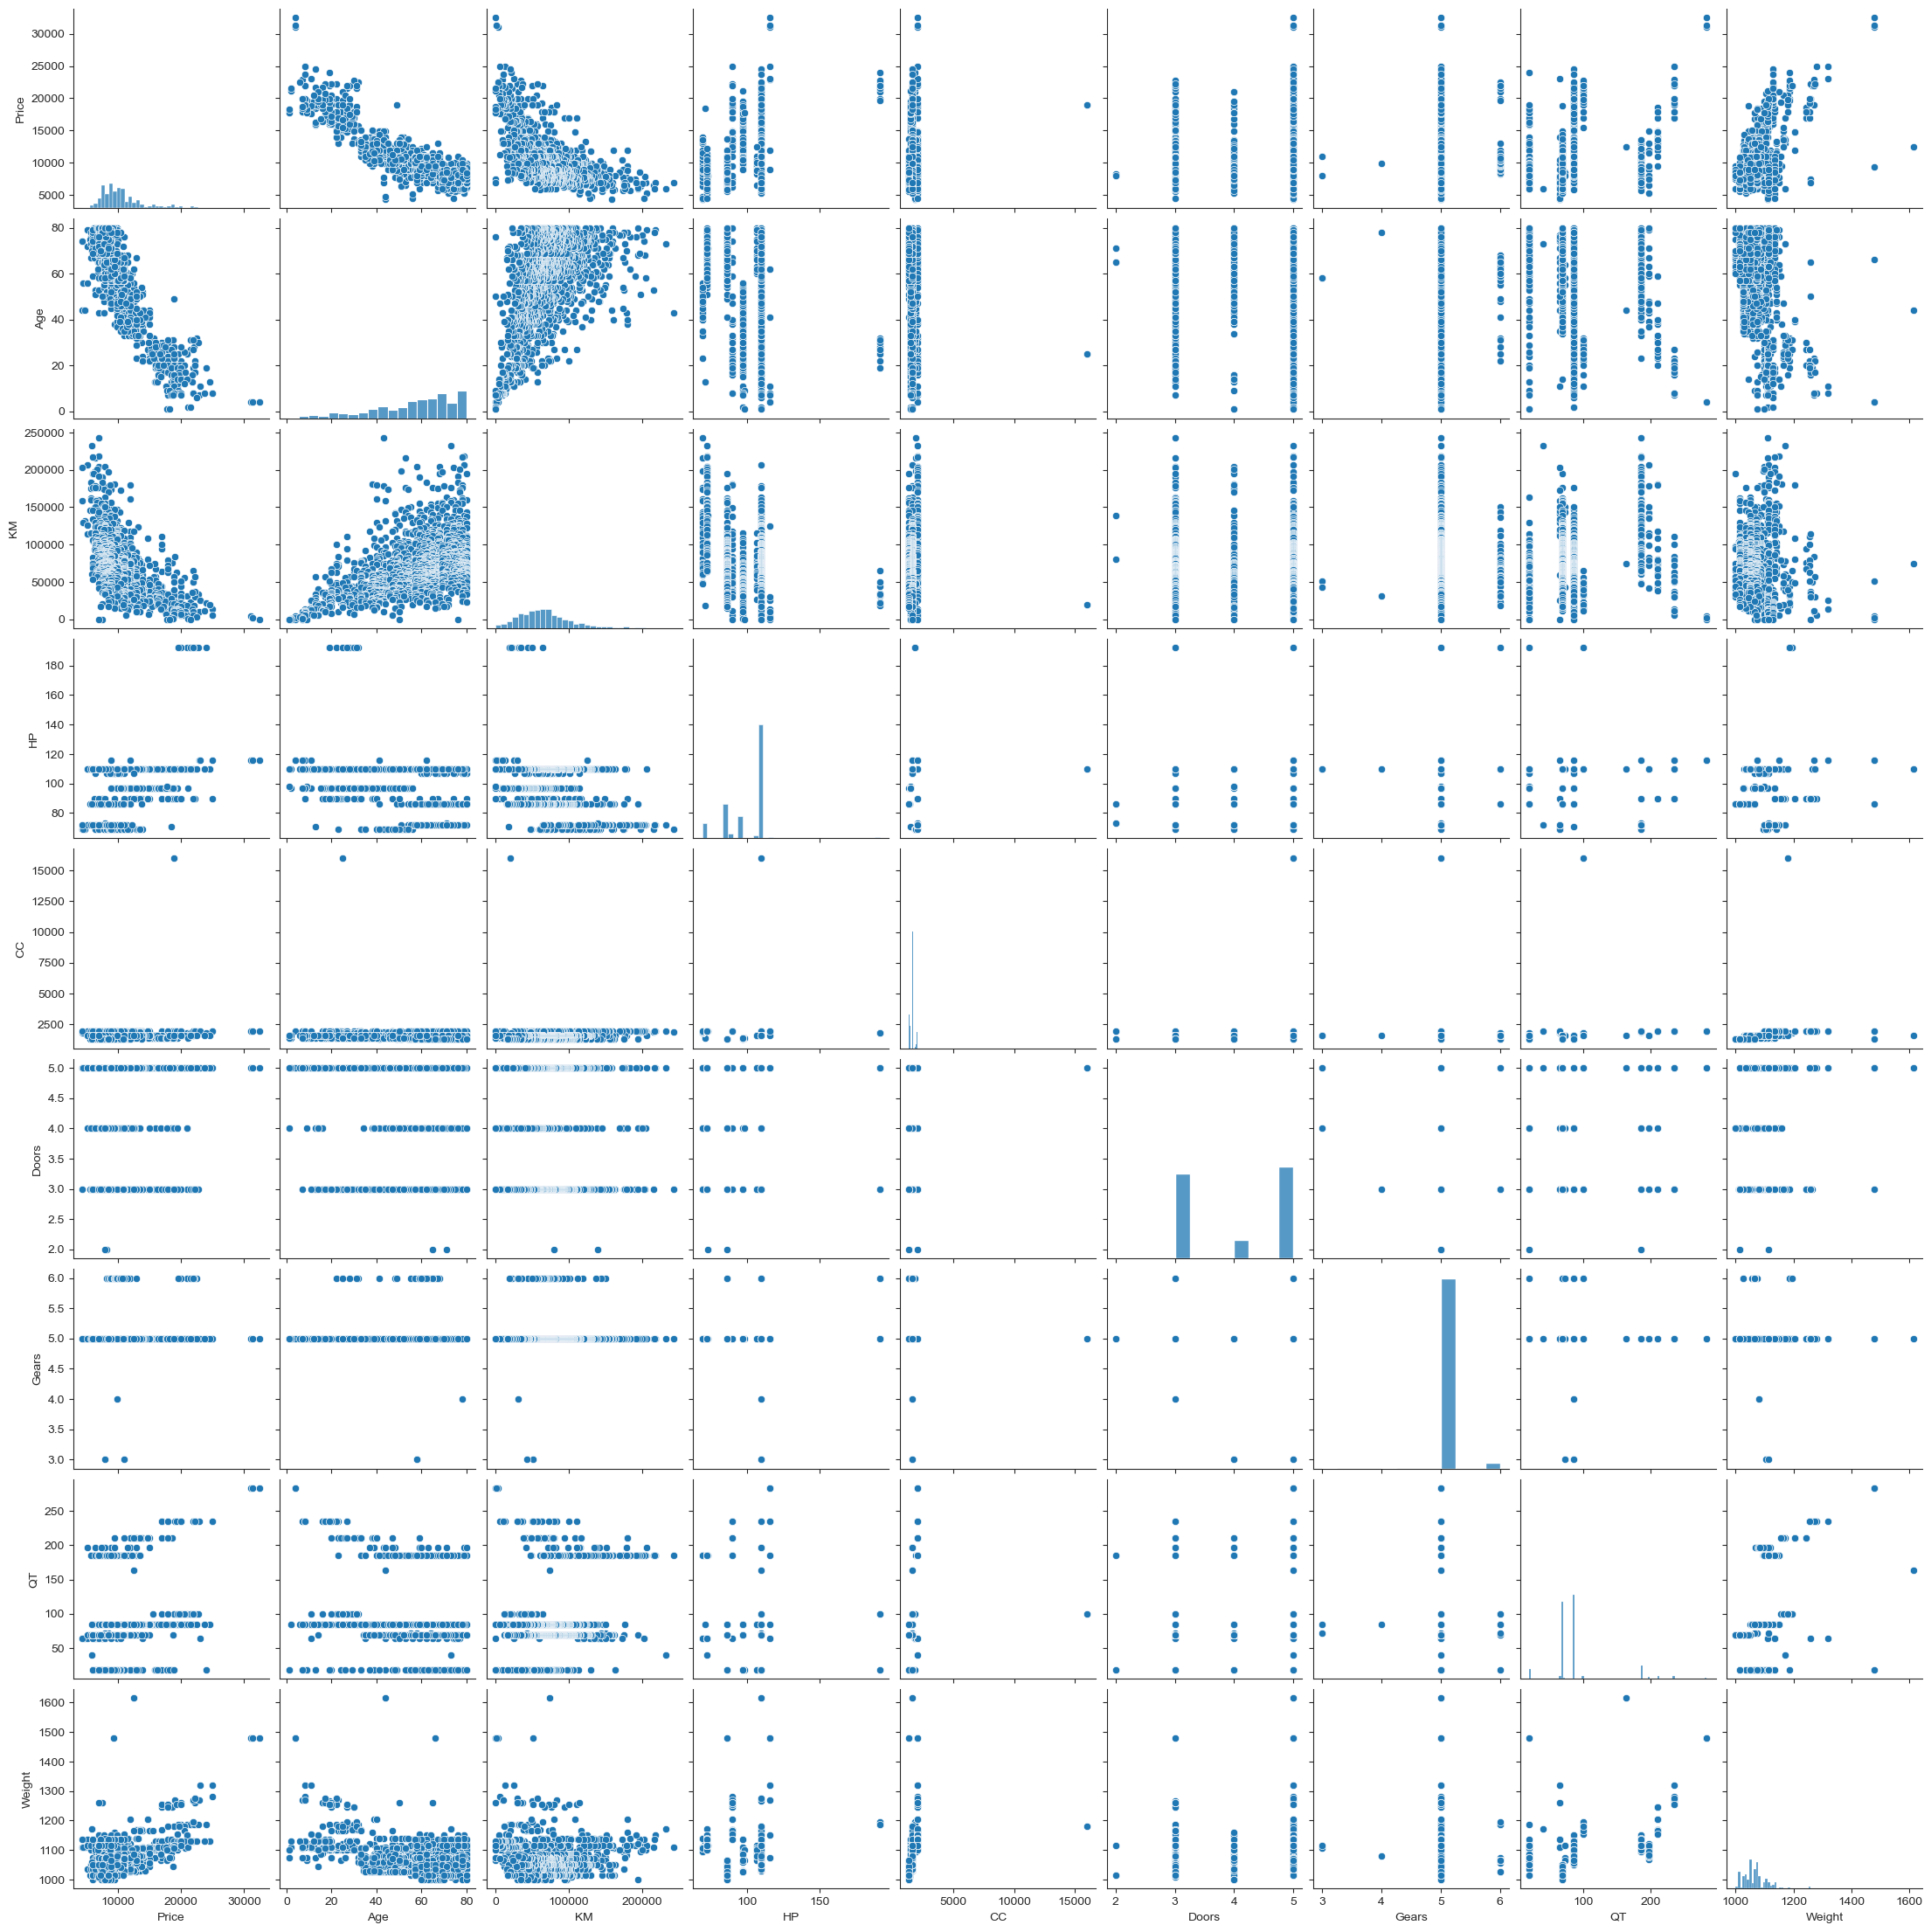

In [24]:
#scatter plots for all the variables
sns.set_style(style='ticks')
sns.pairplot(toycor)

# preparing model

In [25]:

#Build model
import statsmodels.formula.api as smf 
model = smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=toycor).fit()

In [26]:
# Finding the coefficients, P_value, t_value and R_squared value
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Fri, 07 Jul 2023   Prob (F-statistic):               0.00
Time:                        20:16:31   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP            31.5846      2.818     11.210      0.000      26.058      37.112
CC            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
QT             3.8588      1.311      2.944      0.003       1.288       6.430
Weight        16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
# Finding Coefficient parameters
print('Coefficient parameters:\n',model.params)

Coefficient parameters:
 Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
CC             -0.118558
Doors          -0.920189
Gears         597.715894
QT              3.858805
Weight         16.855470
dtype: float64


In [28]:
# Finding tvalues and pvalues
print ('*Tvalues*:\n',model.tvalues,)
print('\n*Pvalues*:\n',np.round(model.pvalues,5))

*Tvalues*:
 Intercept    -3.875273
Age         -46.551876
KM          -16.552424
HP           11.209719
CC           -1.316436
Doors        -0.023012
Gears         3.034563
QT            2.944198
Weight       15.760663
dtype: float64

*Pvalues*:
 Intercept    0.00011
Age          0.00000
KM           0.00000
HP           0.00000
CC           0.18824
Doors        0.98164
Gears        0.00245
QT           0.00329
Weight       0.00000
dtype: float64


In [29]:
#R squared values to check the accuracy of the model
print('R-squared value of model is:',model.rsquared,'\nadjusted_R-squared value of model is:',model.rsquared_adj)

R-squared value of model is: 0.8625200256947 
adjusted_R-squared value of model is: 0.8617487495415146


# Simple Linear Regression

In [30]:
# Build SLR and MLR models for insignificant variables 'CC' and 'Doors'
# Also find their tvalues and pvalues

In [31]:
#simple linear regression
slr_cc=smf.ols('Price~CC',data=toycor).fit()
print('*Tvalue* for cc is:\n', slr_cc.tvalues)
print('\n*Pvalue* for cc is:\n',slr_cc.pvalues) 

*Tvalue* for cc is:
 Intercept    24.879592
CC            4.745039
dtype: float64

*Pvalue* for cc is:
 Intercept    7.236022e-114
CC            2.292856e-06
dtype: float64


In [32]:
#simple linear regression
slr_do=smf.ols('Price~Doors',data=toycor).fit()
print('*Tvalue* for Doors is:\n', slr_do.tvalues)
print('\n*Pvalue* for Doors is:\n',slr_do.pvalues) 

*Tvalue* for Doors is:
 Intercept    19.421546
Doors         7.070520
dtype: float64

*Pvalue* for Doors is:
 Intercept    8.976407e-75
Doors        2.404166e-12
dtype: float64


 CC & Doors have significant pvalues.

In [33]:
#multi linear regression
mlr_cd=smf.ols('Price~CC+Doors',data=toycor).fit()
print('*Tvalue* for CC and Doors are:\n',mlr_cd.tvalues)
print('\n*Pvalue* for CC and Doors are:\n', mlr_cd.pvalues)

*Tvalue* for CC and Doors are:
 Intercept    12.786341
CC            4.268006
Doors         6.752236
dtype: float64

*Pvalue* for CC and Doors are:
 Intercept    1.580945e-35
CC           2.101878e-05
Doors        2.109558e-11
dtype: float64


# Model Validation

### Technique 1: Checking Multicollinearity Using Variance Inflation Factors(VIF).

In [34]:
# Calculate VIF = 1/(1-Rsquare) for all independent variables

rsq_age=smf.ols('Age~KM+HP+CC+Doors+Gears+QT+Weight',data=toycor).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_KM=smf.ols('KM~Age+HP+CC+Doors+Gears+QT+Weight',data=toycor).fit().rsquared
vif_KM=1/(1-rsq_KM)

rsq_HP=smf.ols('HP~Age+KM+CC+Doors+Gears+QT+Weight',data=toycor).fit().rsquared
vif_HP=1/(1-rsq_HP)

rsq_CC=smf.ols('CC~Age+KM+HP+Doors+Gears+QT+Weight',data=toycor).fit().rsquared
vif_CC=1/(1-rsq_CC)

rsq_DR=smf.ols('Doors~Age+KM+HP+CC+Gears+QT+Weight',data=toycor).fit().rsquared
vif_DR=1/(1-rsq_DR)

rsq_GR=smf.ols('Gears~Age+KM+HP+CC+Doors+QT+Weight',data=toycor).fit().rsquared
vif_GR=1/(1-rsq_GR)

rsq_QT=smf.ols('QT~Age+KM+HP+CC+Doors+Gears+Weight',data=toycor).fit().rsquared
vif_QT=1/(1-rsq_QT)

rsq_WT=smf.ols('Weight~Age+KM+HP+CC+Doors+Gears+QT',data=toycor).fit().rsquared
vif_WT=1/(1-rsq_WT)

# Putting the values in Dataframe format
d1={'Variables':['Age','KM','HP','CC','Doors','Gears','QT','Weight'],
    'Vif':[vif_age,vif_KM,vif_HP,vif_CC,vif_DR,vif_GR,vif_QT,vif_WT]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,CC,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,QT,2.295375
7,Weight,2.487180


### Technique 2: residual analysis

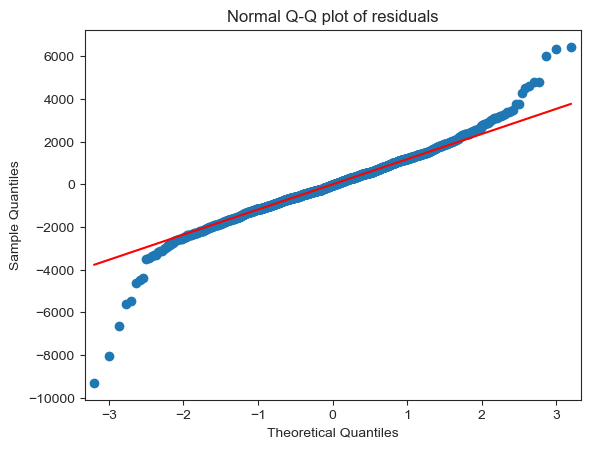

In [35]:
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)
sm.qqplot(model.resid,line='q') # 'q' - A line is fit through the quartiles # line = '45'- to draw the 45-degree diagonal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [36]:
list(np.where(model.resid>6000))  
# outliar detection from above QQ plot of residuals

[array([109, 146, 522], dtype=int64)]

In [37]:
list(np.where(model.resid<-6000))

[array([220, 600, 959], dtype=int64)]

In [38]:
# Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)

def standard_values(vals) : return (vals-vals.mean())/vals.std()  # User defined z = (x - mu)/sigma

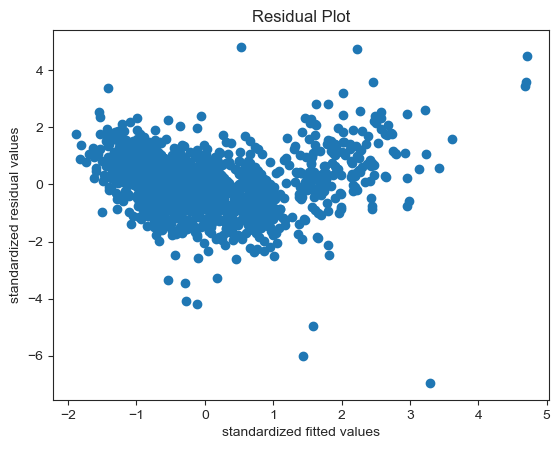

In [39]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show() 

In [40]:
# Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors 
# using Residual Regression Plots code graphics.plot_regress_exog(model,'x',fig)    # exog = x-variable & endog = y-variable


In [41]:
from statsmodels.graphics.regressionplots import influence_plot

eval_env: 1


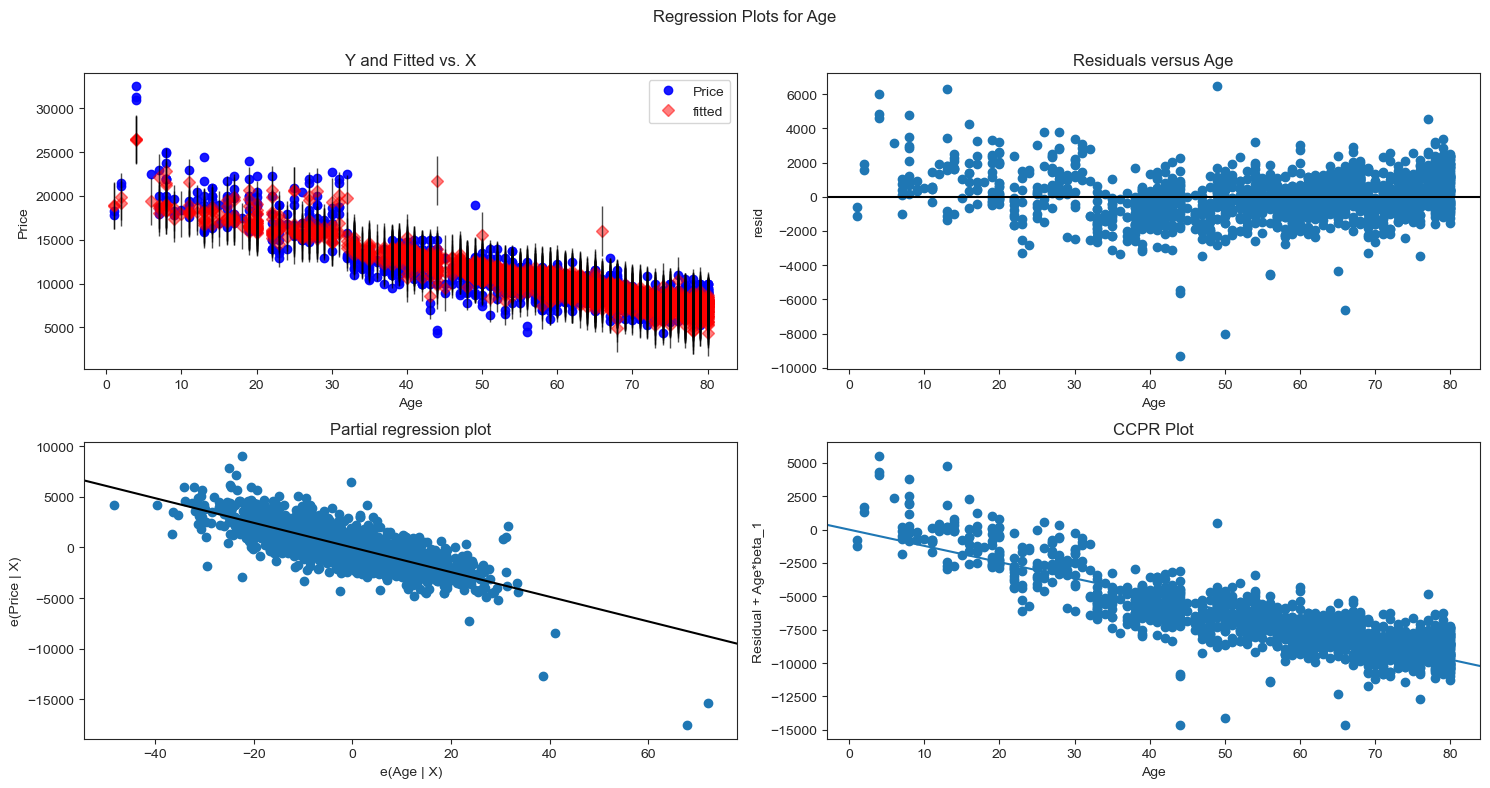

In [42]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Age',fig=fig)
plt.show()

eval_env: 1


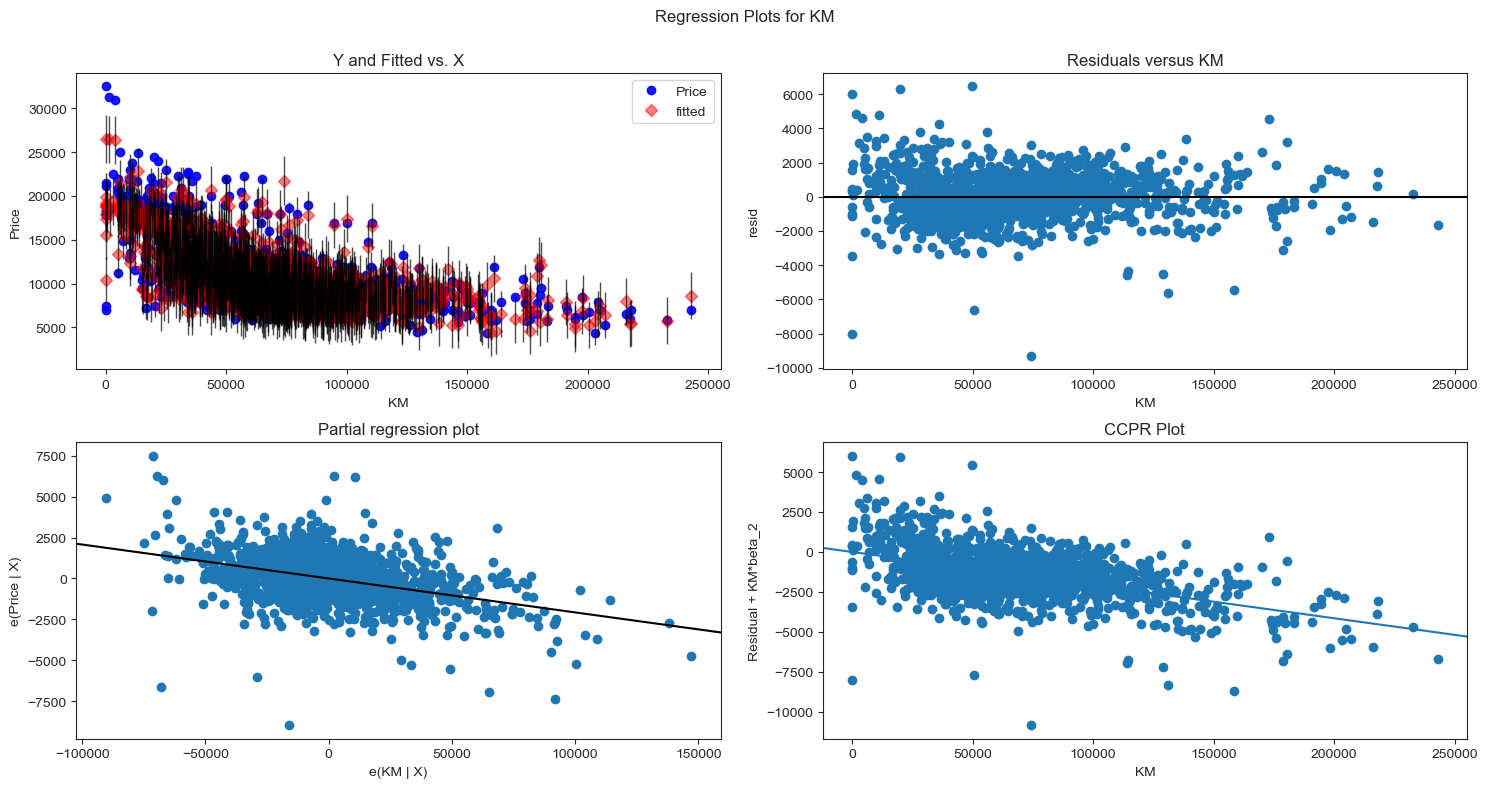

In [43]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()

eval_env: 1


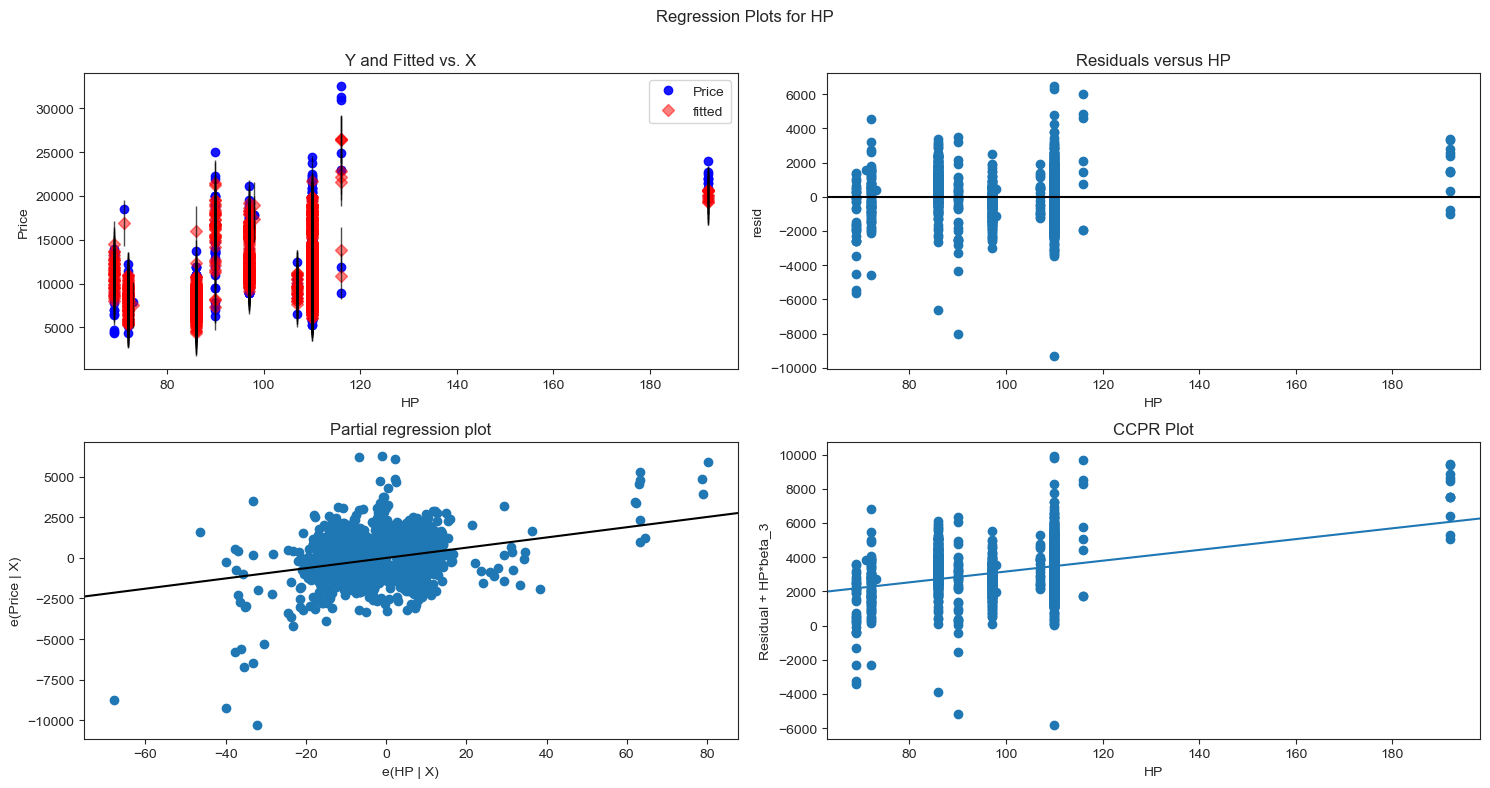

In [44]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

eval_env: 1


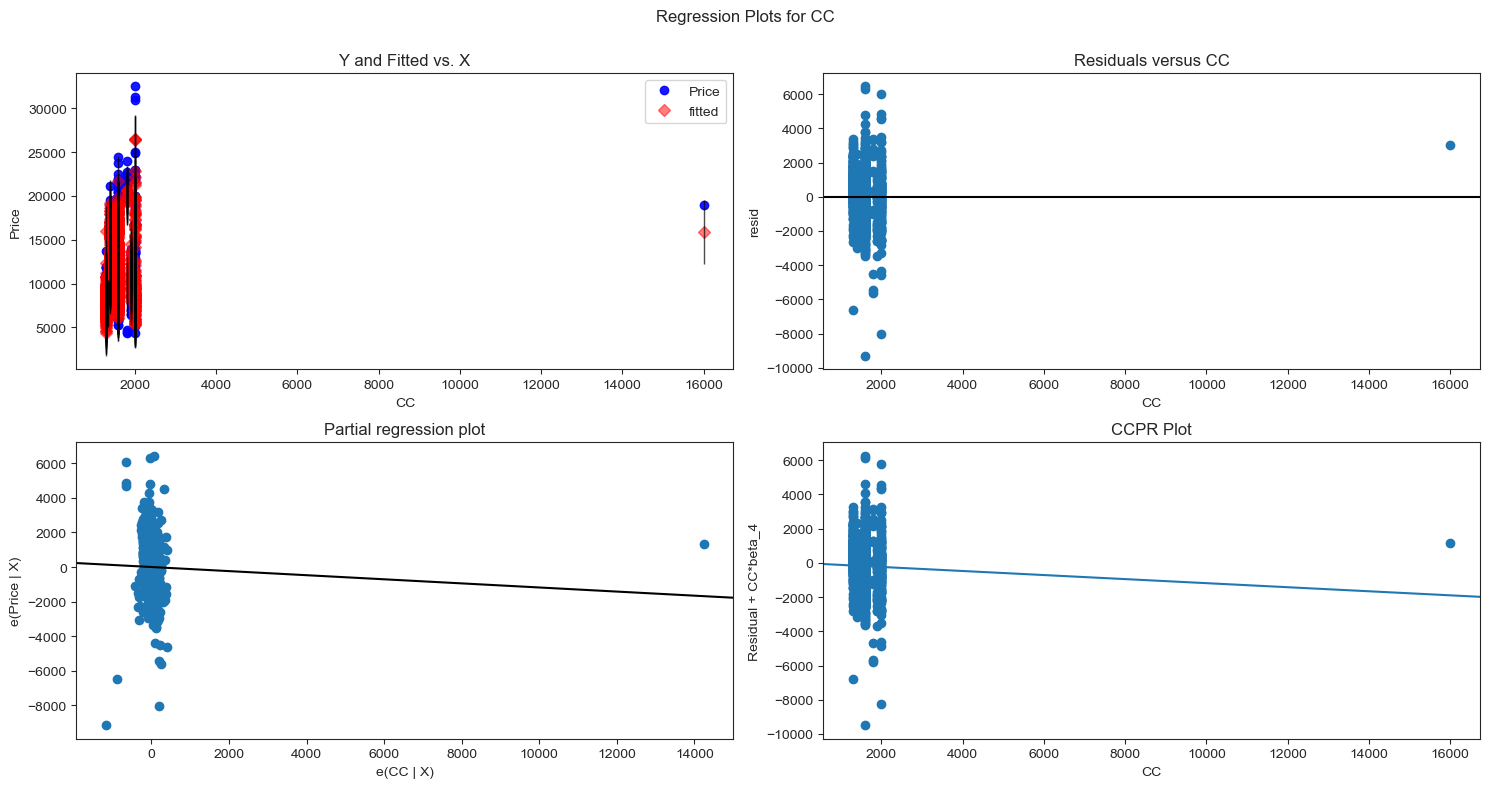

In [45]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'CC',fig=fig)
plt.show()


eval_env: 1


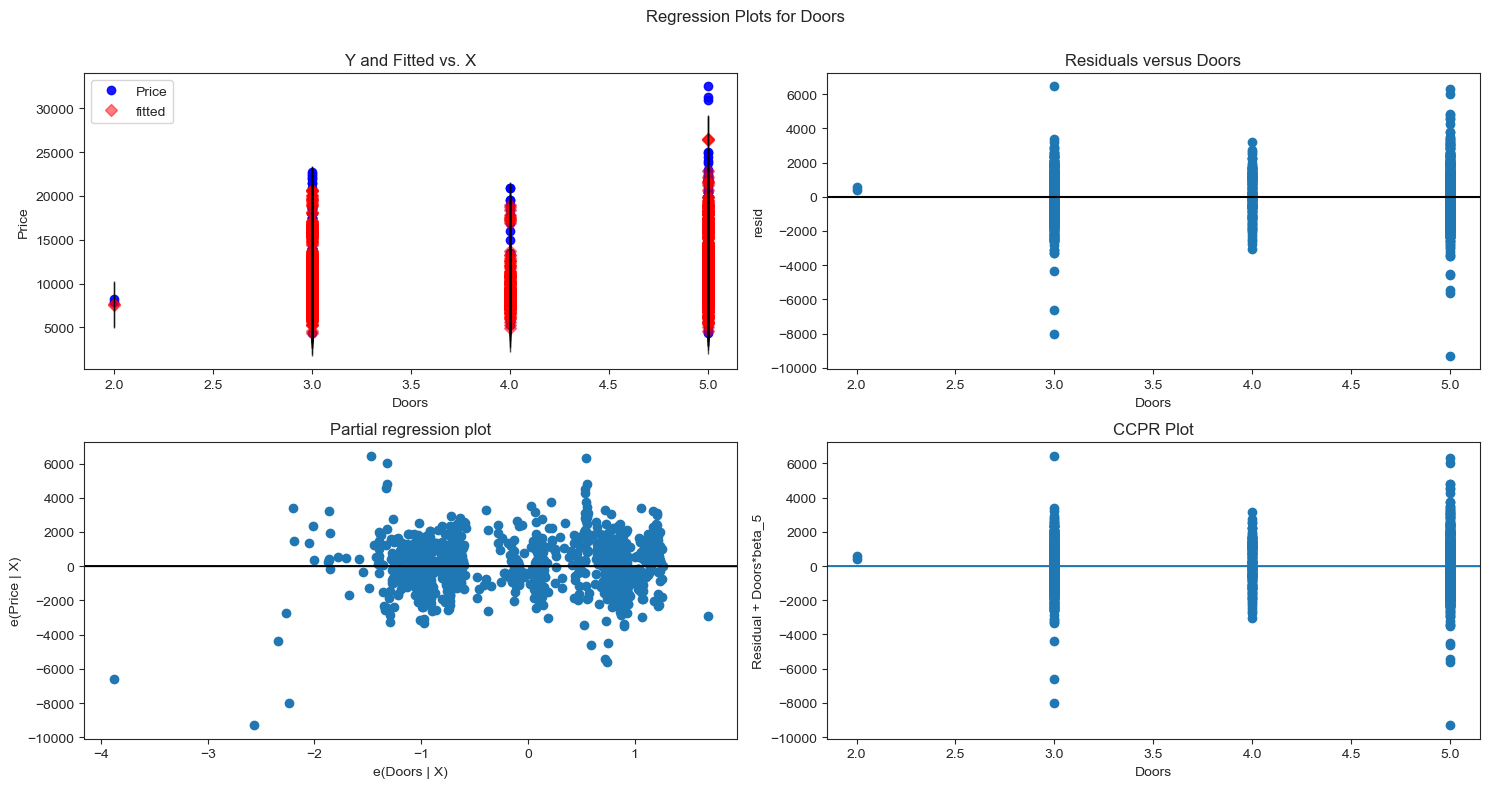

In [46]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Doors',fig=fig)
plt.show()

eval_env: 1


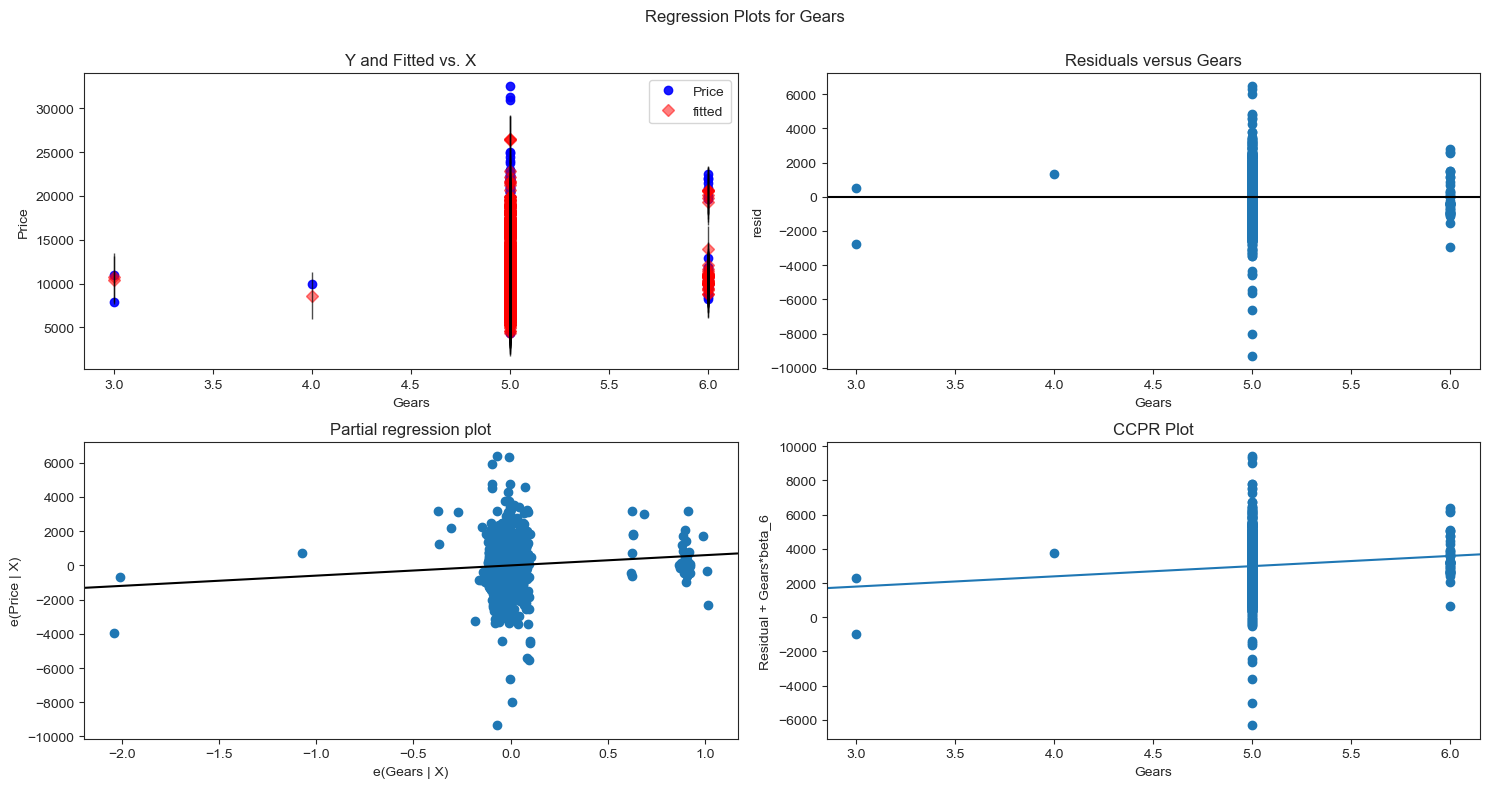

In [47]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Gears',fig=fig)
plt.show()

eval_env: 1


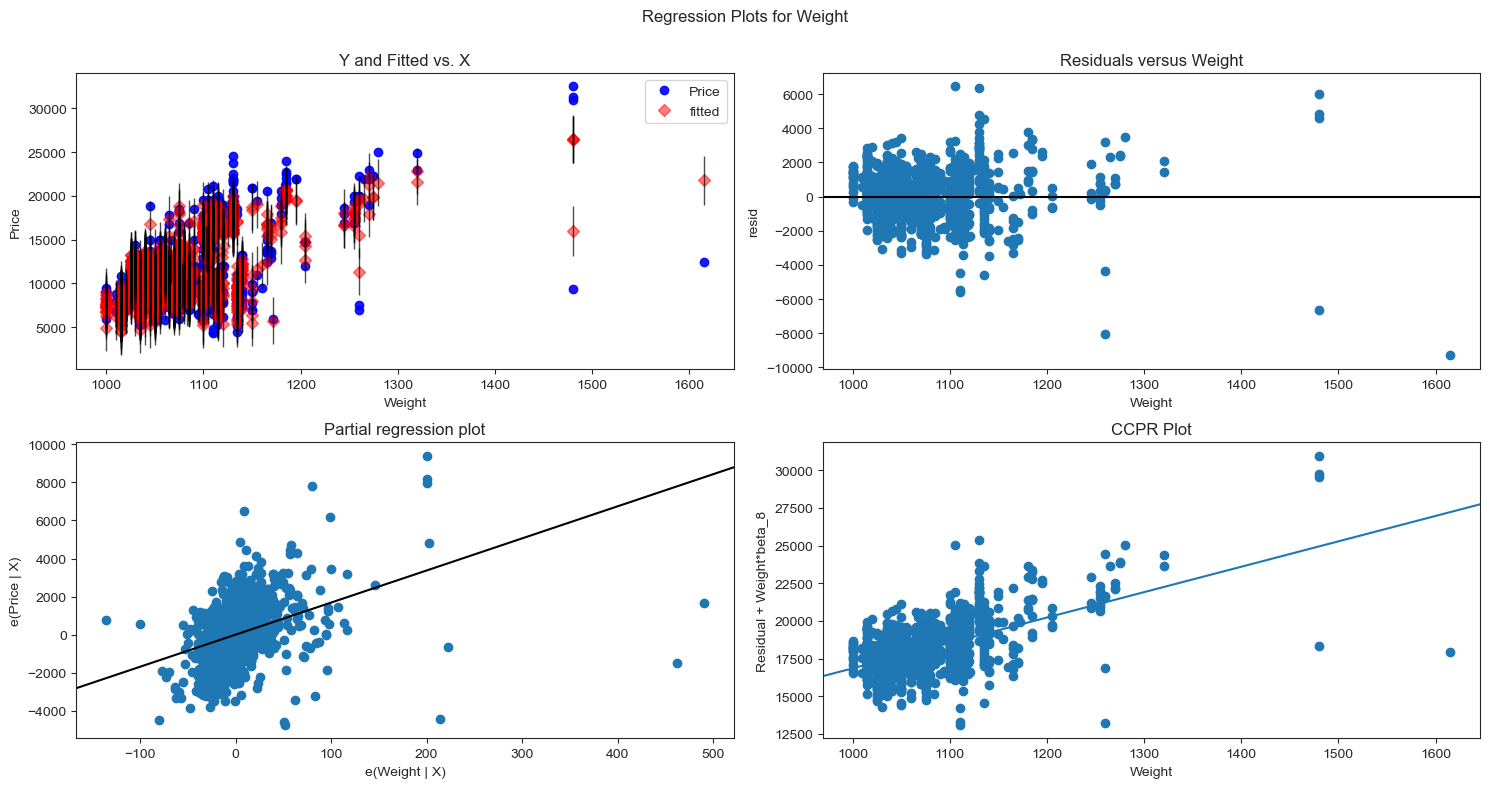

In [48]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Weight',fig=fig)
plt.show()

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


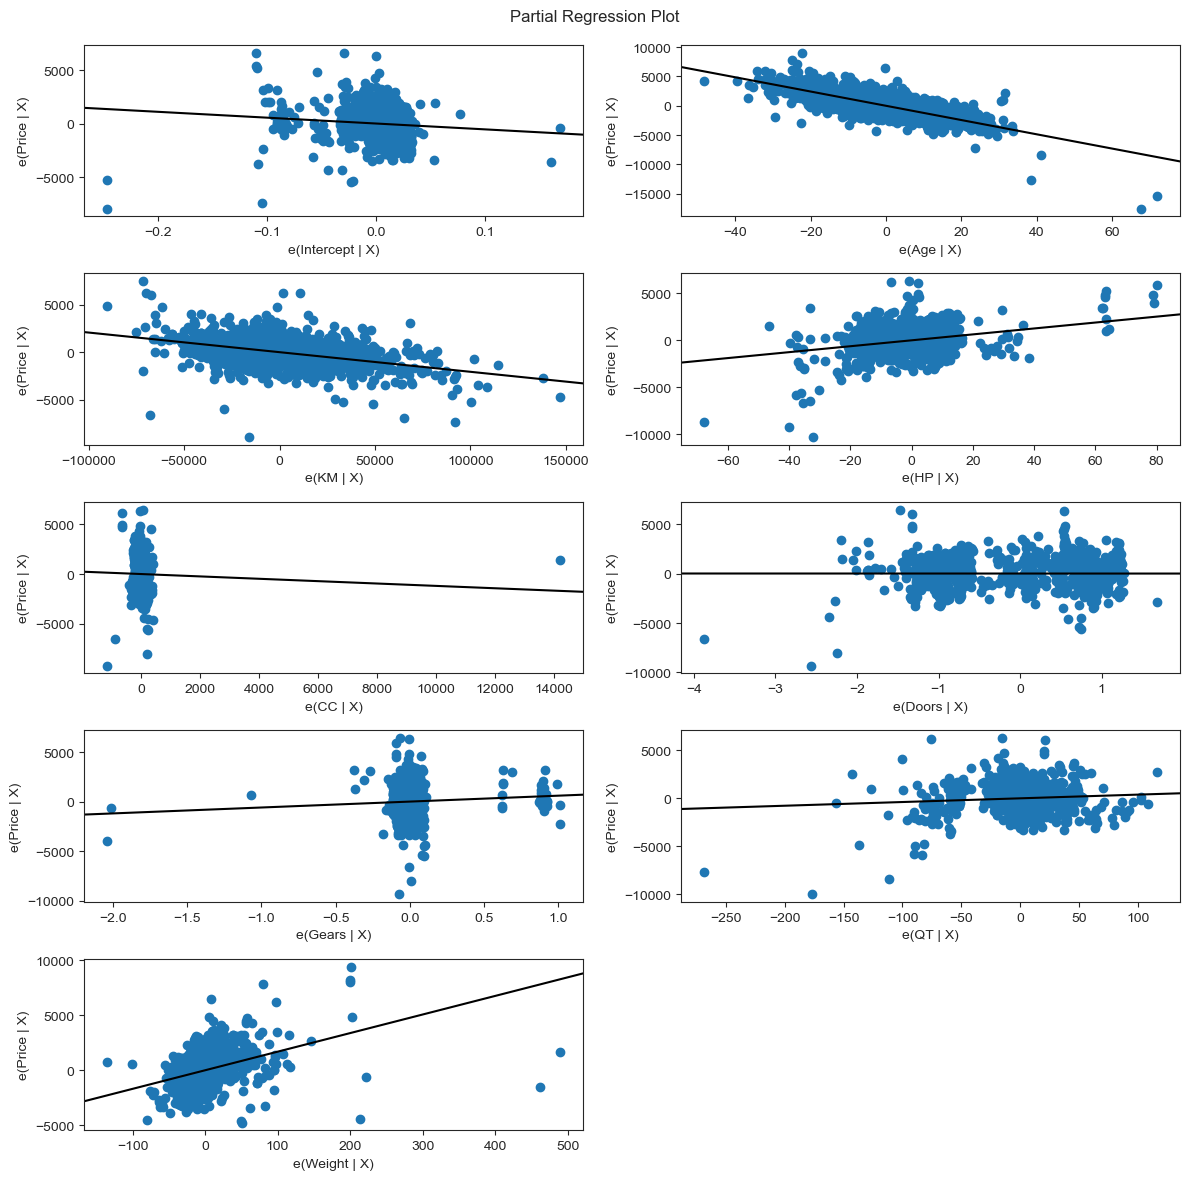

In [49]:
fig = plt.figure(figsize=(12,12))
fig = sm.graphics.plot_partregress_grid(model, fig=fig)

# Model Deletion Diagnostics

### checking Outliers or Influencers with Two Techniques : 
### 1. Cook's Distance & 2. Leverage value


In [50]:
#1. Cook's Distance: If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance
(c,_)=model.get_influence().cooks_distance
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110550e-07, 6.99854767e-04, 1.08408002e-02])

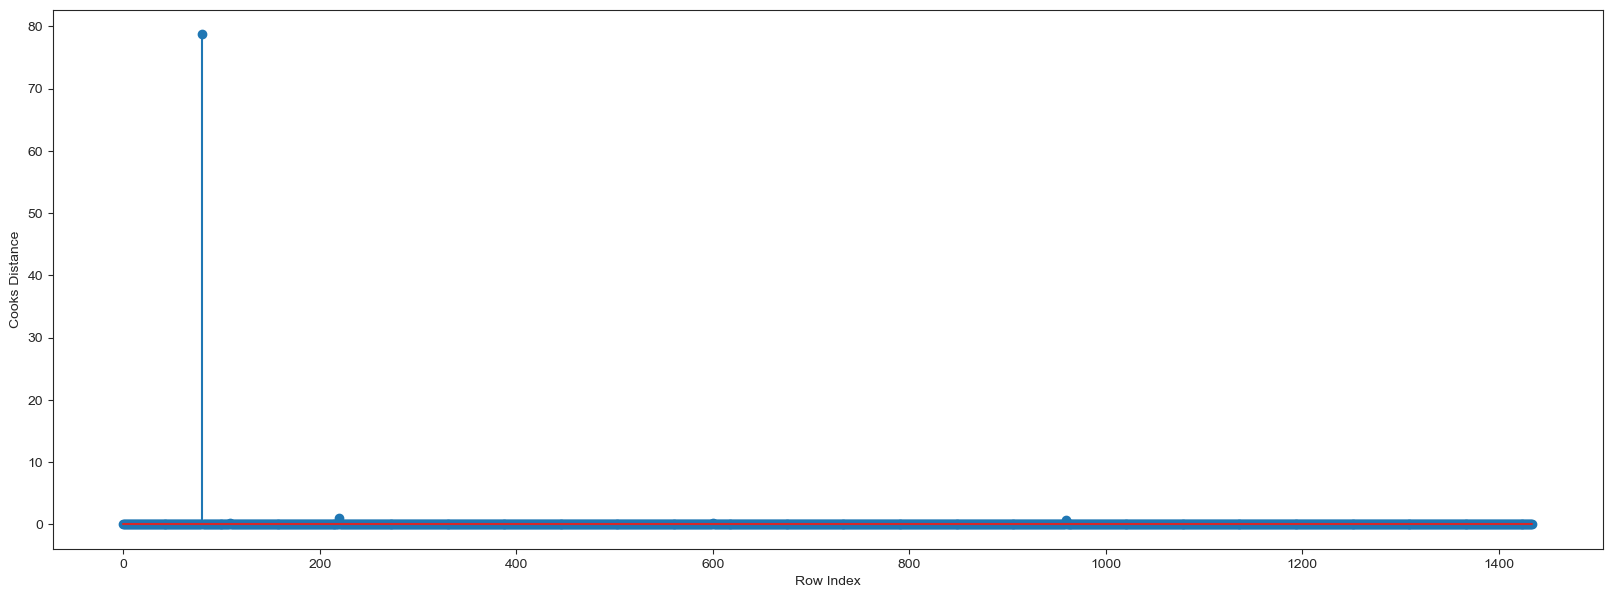

In [51]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(toycor)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

there is one outlier prersent in dataset

In [52]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(80, 78.7295058224916)

as per cook,s distance there is one outlier present in the data set.
but to find more evidence we are using second technique and that is Leverage Value.

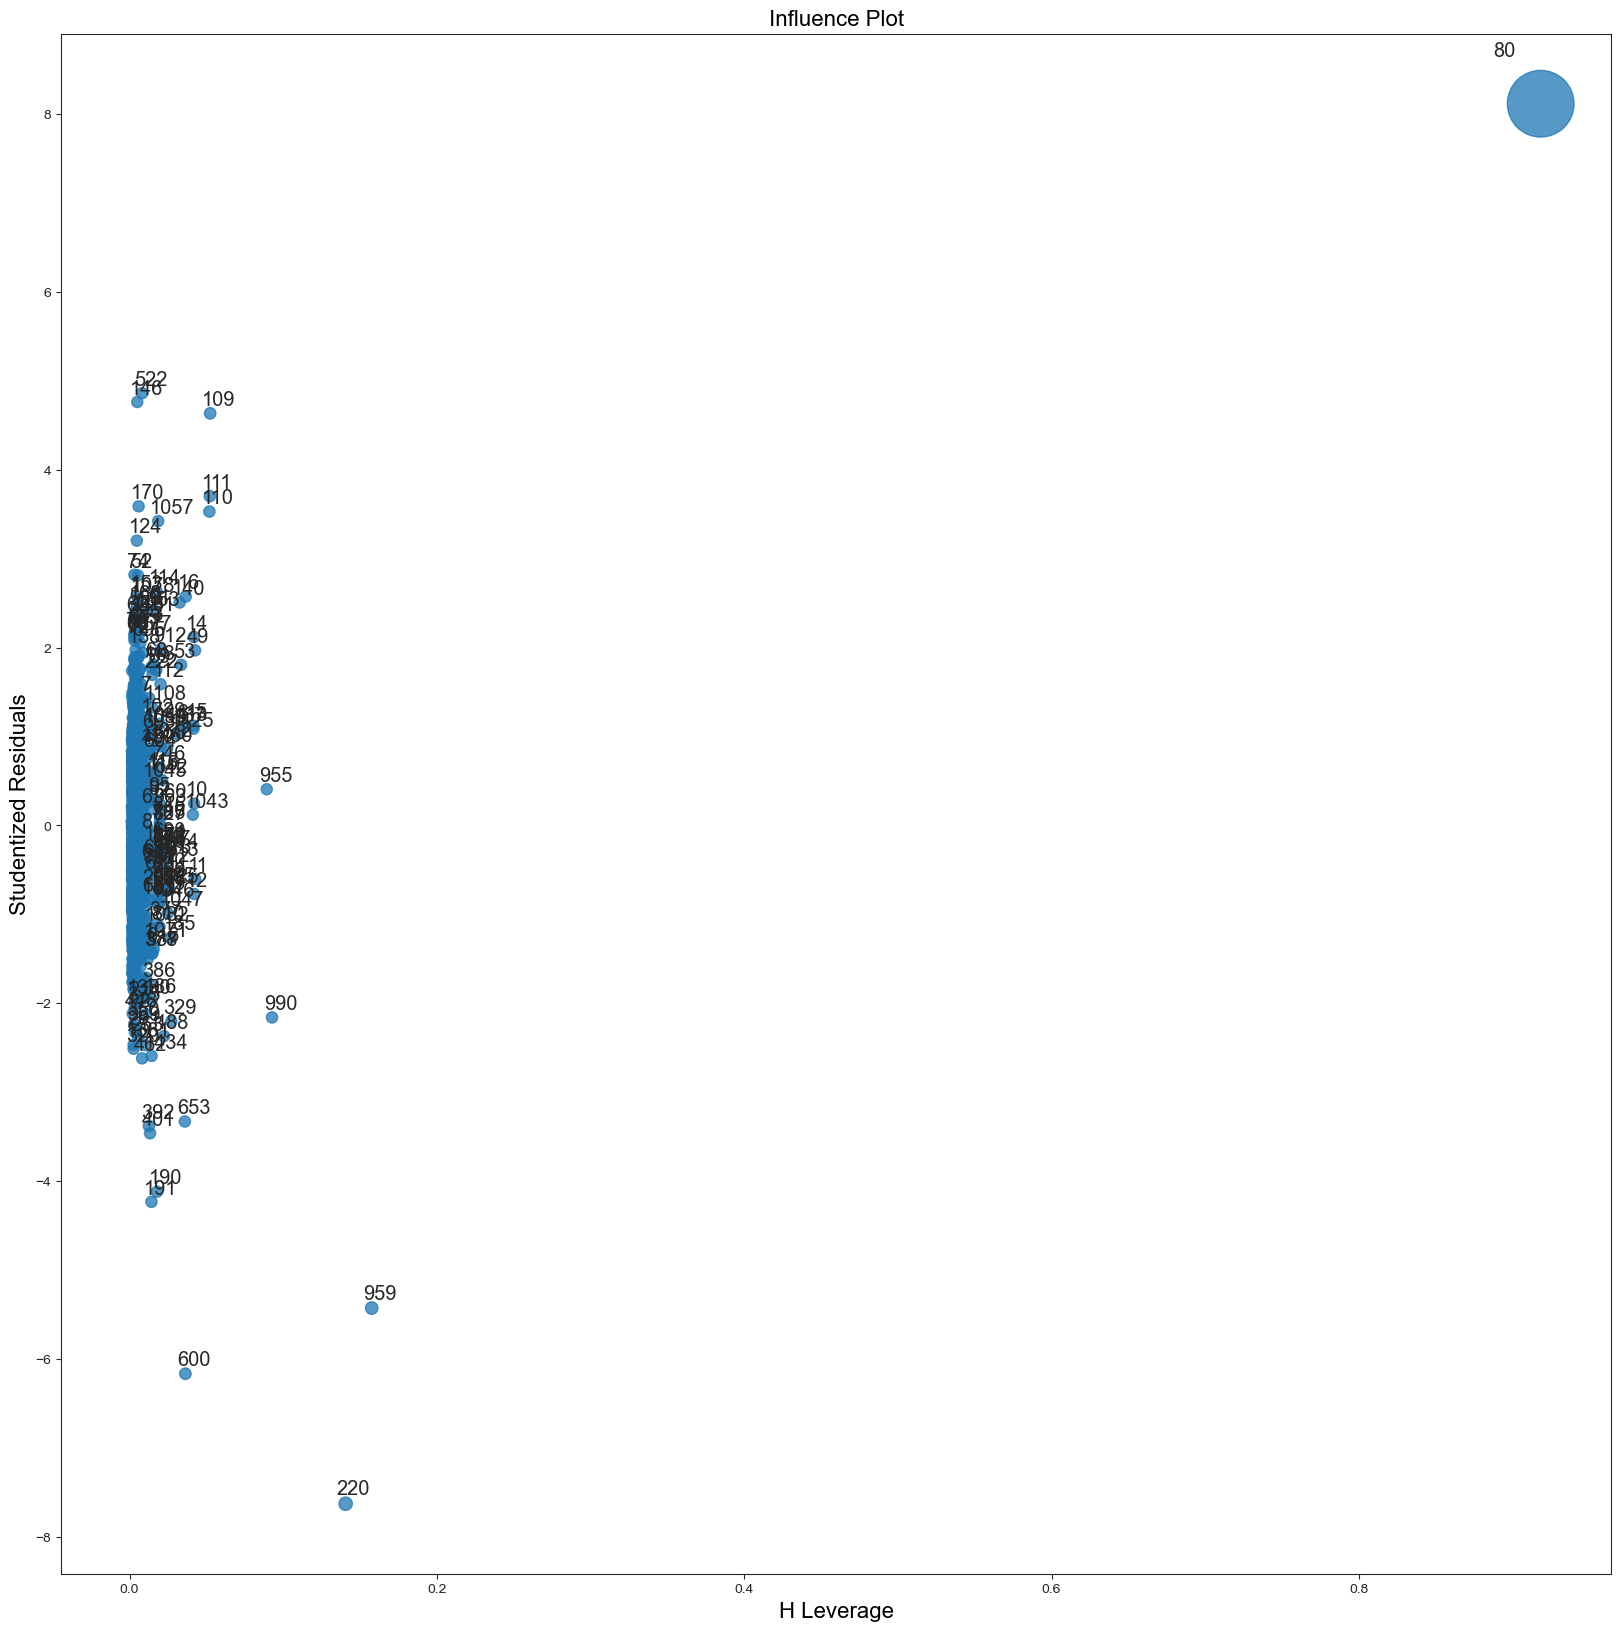

In [53]:
# 2. Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
fig,ax=plt.subplots(figsize=(20,20))
fig=influence_plot(model,ax = ax)

outlier is present at 80th row of the dataset.

In [54]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=toycor.shape[1]
n=toycor.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.020905923344947737

In [55]:
toycor[toycor.index.isin([80])] 

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
80,18950,25,20019,110,16000,5,5,100,1180


# Improving the Model

In [56]:
# Creating a copy of data so that original dataset is not affected
toycor_new=toycor.copy()
toycor_new

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [57]:
toycor_new.shape

(1435, 9)

In [58]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
toycor_new1=toycor_new.drop(toycor_new.index[[80]],axis=0).reset_index(drop=True)
toycor_new1

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [59]:
toycor_new1.shape

(1434, 9)

# Model Deletion Diagnostics and Final Model

In [60]:
 while np.max(c)>0.5 :
    model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=toycor_new1).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    toycor_new1=toycor_new1.drop(toycor_new1.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    toycor_new1
else:
    final_model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=toycor_new1).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8882395145171204


In [61]:
if np.max(c)>0.5:
    model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=toycor_new1).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    toycor_new1=toycor_new1.drop(toyo5.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    toycor_new1 
elif np.max(c)<0.5:
    final_model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=toycor_new1).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)


Thus model accuracy is improved to 0.8882395145171204


In [62]:
final_model.rsquared

0.8882395145171204

In [63]:
toycor_new1

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1426,7500,69,20544,86,1300,3,5,69,1025
1427,10845,72,19000,86,1300,3,5,69,1015
1428,8500,71,17016,86,1300,3,5,69,1015
1429,7250,70,16916,86,1300,3,5,69,1015


# Model Predictions

In [64]:
# consider New data for prediction is
new_data=pd.DataFrame({'Age':14,"KM":45000,"HP":86,"CC":1600,"Doors":3,"Gears":5,"QT":69,"Weight":1012},index=[0])
new_data

,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,14,45000,86,1600,3,5,69,1012


In [65]:
# Manual Prediction of Price
final_model.predict(new_data)

0    13277.870007
dtype: float64

In [66]:
# Automatic Prediction of Price with 90.02% accurcy
pred_y=final_model.predict(toycor_new1)
pred_y

0       16345.352610
1       15886.635544
2       16328.224968
3       15996.318854
4       15883.424182
            ...     
1426     9161.230587
1427     8536.091326
1428     8681.531063
1429     8793.668694
1430    10860.695492
Length: 1431, dtype: float64

In [67]:
pred_price = pd.DataFrame()
pred_price = toycor_new1
pred_price['predicted_price'] = pred_y

In [68]:
pred_price

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight,predicted_price
0,13500,23,46986,90,2000,3,5,210,1165,16345.352610
1,13750,23,72937,90,2000,3,5,210,1165,15886.635544
2,13950,24,41711,90,2000,3,5,210,1165,16328.224968
3,14950,26,48000,90,2000,3,5,210,1165,15996.318854
4,13750,30,38500,90,2000,3,5,210,1170,15883.424182
...,...,...,...,...,...,...,...,...,...,...
1426,7500,69,20544,86,1300,3,5,69,1025,9161.230587
1427,10845,72,19000,86,1300,3,5,69,1015,8536.091326
1428,8500,71,17016,86,1300,3,5,69,1015,8681.531063
1429,7250,70,16916,86,1300,3,5,69,1015,8793.668694


# Q2 
# Prepare a prediction model for profit of 50_startups data.
# Do transformations for getting better predictions of profit and
# make a table containing R^2 value for each prepared model.

In [69]:
# importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [72]:
#imporitng dataset
startups = pd.read_excel('50_Startups.xlsx')
startups.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [73]:
startups.shape

(50, 5)

# EDA and Data Visualization

In [74]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [75]:
startups1 =startups.rename({'R&D Spend':'RDS','Administration':'ADMS','Marketing Spend':'MKTS'},axis=1)
startups1.head()

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [76]:
startups1.describe()

,RDS,ADMS,MKTS,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [77]:
#checking missing values
startups1.isna().sum()

RDS       0
ADMS      0
MKTS      0
State     0
Profit    0
dtype: int64

In [78]:
startups1[startups1.duplicated()].sum()

RDS       0.0
ADMS      0.0
MKTS      0.0
State     0.0
Profit    0.0
dtype: float64

* **this Dataset has no duplicate values.**

### Correlation Analysis

In [79]:
startups1.corr()

C:\Users\HP\AppData\Local\Temp\ipykernel_7384\1686692606.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  startups1.corr()


,RDS,ADMS,MKTS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
ADMS,0.241955,1.000000,-0.032154,0.200717
MKTS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


C:\Users\HP\AppData\Local\Temp\ipykernel_7384\3760627708.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(startups1.corr(),annot=True, cmap="mako")


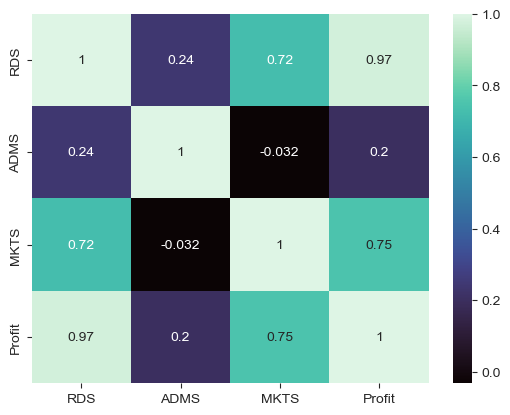

In [80]:
sns.heatmap(startups1.corr(),annot=True, cmap="mako")
plt.show()

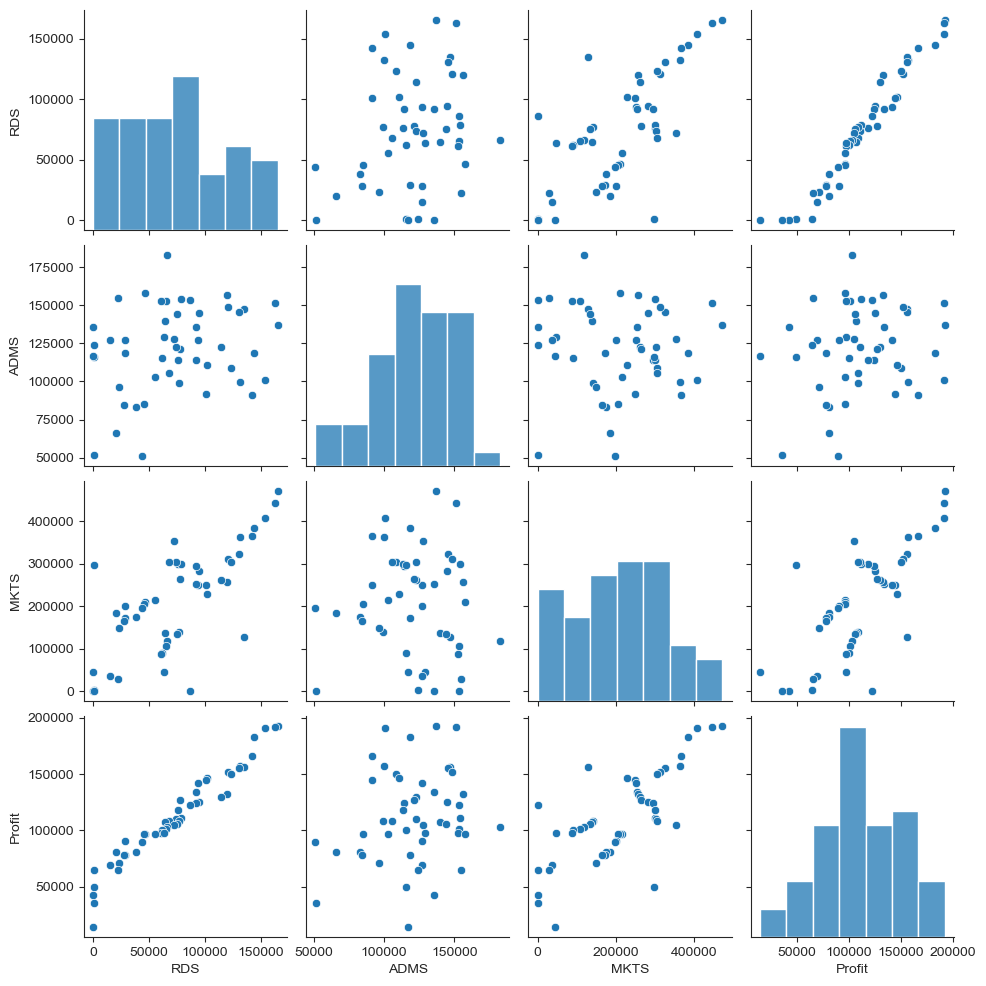

In [81]:
#scatter plots for all the variables
sns.set_style(style='ticks')
sns.pairplot(startups1)

# Model Building

In [82]:
#Build model
import statsmodels.formula.api as smf
model_startup=smf.ols("Profit~RDS+ADMS+MKTS",data=startups1).fit()

In [83]:
# Finding the coefficients, P_value, t_value and R_squared value
model_startup.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Fri, 07 Jul 2023   Prob (F-statistic):           4.53e-30
Time:                        20:17:38   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDS            0.8057      0.045     17.846      0.000       0.715       0.897
ADMS          -0.0268      0.051     -0.526      0.602      -0.130       0.076
MKTS           0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model testing

In [84]:
# Finding Coefficient parameters
print('Coefficient parameters:\n',model_startup.params)

Coefficient parameters:
 Intercept    50122.192990
RDS              0.805715
ADMS            -0.026816
MKTS             0.027228
dtype: float64


In [85]:
# Finding tvalues and pvalues
print ('*Tvalues*:\n',model_startup.tvalues) 
print('\n*Pvalues*:\n',np.round(model_startup.pvalues,5))

*Tvalues*:
 Intercept     7.626218
RDS          17.846374
ADMS         -0.525507
MKTS          1.655077
dtype: float64

*Pvalues*:
 Intercept    0.00000
RDS          0.00000
ADMS         0.60176
MKTS         0.10472
dtype: float64


In [86]:
# Finding rsquared values
print('model r-squared value is:',model_startup.rsquared)
print('model adj_rsquared value is:',model_startup.rsquared_adj)
print('model accuracy is:',model_startup.rsquared_adj *100)

model r-squared value is: 0.9507459940683246
model adj_rsquared value is: 0.9475337762901719
model accuracy is: 94.7533776290172


* Adjusted R2 is the accuracy of the model.

# Simple Linear Regression

In [87]:
# Build SLR and MLR models for insignificant variables 'ADMS' and 'MKTS'
# Also find their tvalues and pvalues

In [88]:
slr_adms=smf.ols("Profit~ADMS",data=startups1).fit()
print('*Tvalue* for ADSM is:\n',slr_adms.tvalues)
print('\n*Pvalue* for ADSM is:\n',slr_adms.pvalues)

*Tvalue* for ADSM is:
 Intercept    3.040044
ADMS         1.419493
dtype: float64

*Pvalue* for ADSM is:
 Intercept    0.003824
ADMS         0.162217
dtype: float64


* ADMS has in-significant pvalue.

In [89]:
slr_rds=smf.ols("Profit~RDS",data=startups1).fit()
print('*Tvalue* for RDS is:\n',slr_rds.tvalues) 
print('\n*Pvalue* for RDS is:\n',slr_rds.pvalues)

*Tvalue* for RDS is:
 Intercept    19.320288
RDS          29.151139
dtype: float64

*Pvalue* for RDS is:
 Intercept    2.782697e-24
RDS          3.500322e-32
dtype: float64


In [90]:
slr_mkts=smf.ols("Profit~MKTS",data=startups1).fit()
print('*Tvalue* for MKTS is:\n',slr_mkts.tvalues)
print('\n*Pvalue* for MKTS is:\n',slr_mkts.pvalues)

*Tvalue* for MKTS is:
 Intercept    7.808356
MKTS         7.802657
dtype: float64

*Pvalue* for MKTS is:
 Intercept    4.294735e-10
MKTS         4.381073e-10
dtype: float64


# Multi-Linear Regression

In [91]:
mlr_am=smf.ols("Profit~ADMS+MKTS",data=startups1).fit()
print('*Tvalue* for ADSM and MKTS are:\n',mlr_am.tvalues)
print('\n*Pvalue* for ADSM and MKTS are:\n',mlr_am.pvalues)  

*Tvalue* for ADSM and MKTS are:
 Intercept    1.142741
ADMS         2.467779
MKTS         8.281039
dtype: float64

*Pvalue* for ADSM and MKTS are:
 Intercept    2.589341e-01
ADMS         1.729198e-02
MKTS         9.727245e-11
dtype: float64


* varaibles have significant pvalue

In [92]:
startups1.columns

Index(['RDS', 'ADMS', 'MKTS', 'State', 'Profit'], dtype='object')

# Model Validation
### Technique 1: Checking Multicollinearity Using Variance Inflation Factors(VIF).¶

In [93]:
# Calculate VIF = 1/(1-Rsquare) for all independent variables

rsq_rds=smf.ols('RDS~ADMS+MKTS',data=startups1).fit().rsquared
vif_rds=1/(1-rsq_rds)

rsq_adms=smf.ols('ADMS~RDS+MKTS',data=startups1).fit().rsquared
vif_adms=1/(1-rsq_adms)

rsq_mkts=smf.ols('MKTS~ADMS+RDS',data=startups1).fit().rsquared
vif_mkts=1/(1-rsq_mkts)

# Putting the values in Dataframe format
data={'Variables':['RDS', 'ADMS', 'MKTS'],
    'Vif':[vif_rds,vif_adms,vif_mkts]}
Vif_data=pd.DataFrame(data)
Vif_data

,Variables,Vif
0,RDS,2.468903
1,ADMS,1.175091
2,MKTS,2.326773


In [94]:
data

{'Variables': ['RDS', 'ADMS', 'MKTS'],
 'Vif': [2.4689030699947017, 1.1750910070550458, 2.3267732905308773]}

* None variable has VIF>20, No Collinearity, so considering all varaibles in Regression equation.


### Technique 2:  Residual Analysis

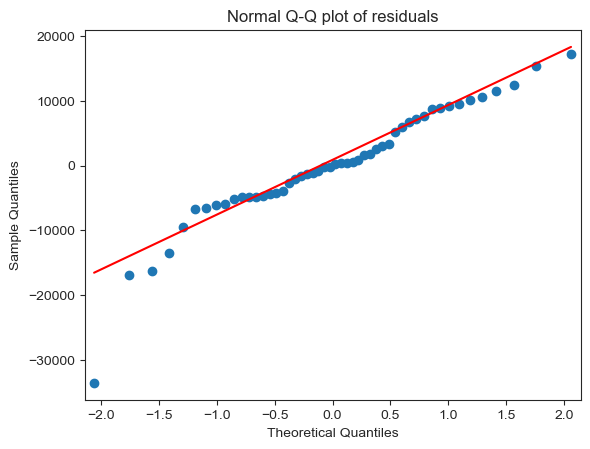

In [95]:
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)

sm.qqplot(model_startup.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

#### outliar detection from above QQ plot of residuals:

In [96]:
list(np.where(model_startup.resid>30000))

[array([], dtype=int64)]

In [97]:
list(np.where(model_startup.resid<-30000))

[array([49], dtype=int64)]

* ONE OUTLIER IS DETECTED THROUGH THIS TECHNIQUE

In [98]:
# Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)

def standard_values_S(valss) : return (valss-valss.mean())/valss.std()  
# User defined z = (x - mu)/sigma

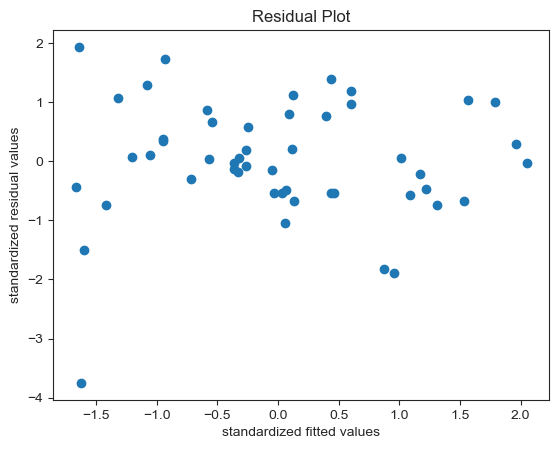

In [99]:
plt.scatter(standard_values_S(model_startup.fittedvalues),standard_values_S(model_startup.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show()

In [100]:
# Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors 
# using Residual Regression Plots code graphics.plot_regress_exog(model,'x',fig)    # exog = x-variable & endog = y-variable


In [101]:
from statsmodels.graphics.regressionplots import influence_plot

eval_env: 1


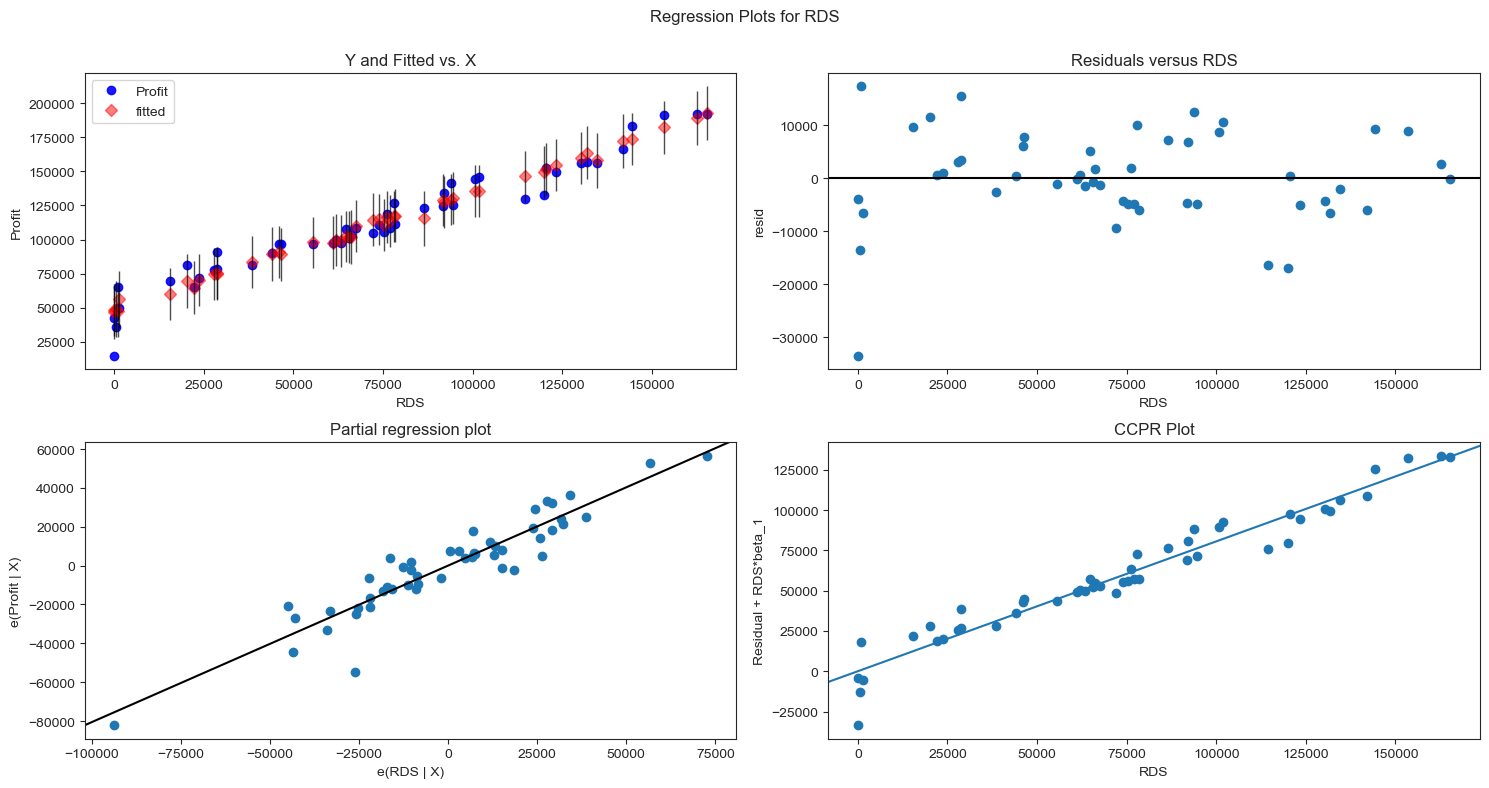

In [102]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model_startup,'RDS',fig=fig)
plt.show()

eval_env: 1


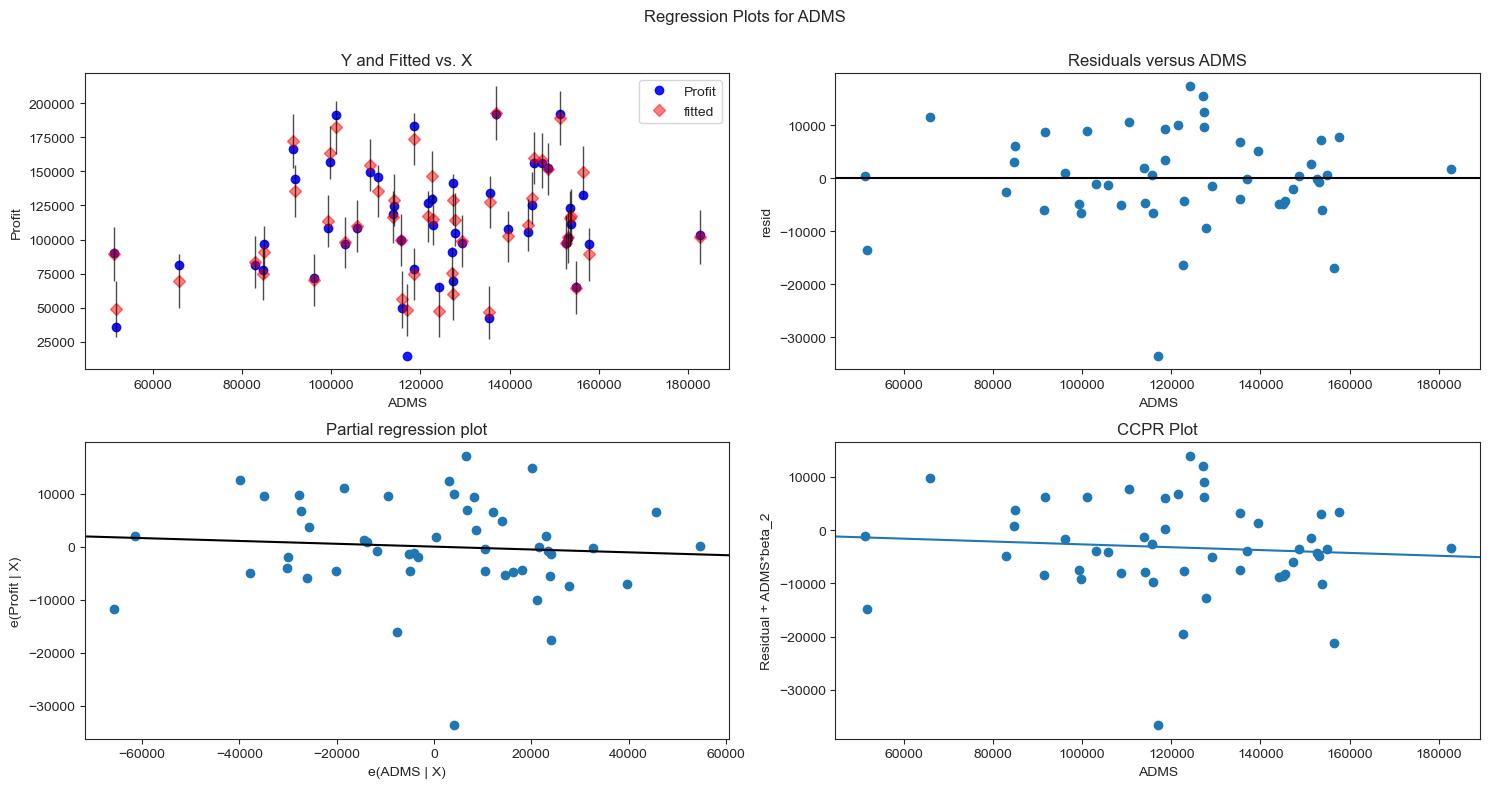

In [103]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model_startup,'ADMS',fig=fig)
plt.show()

eval_env: 1


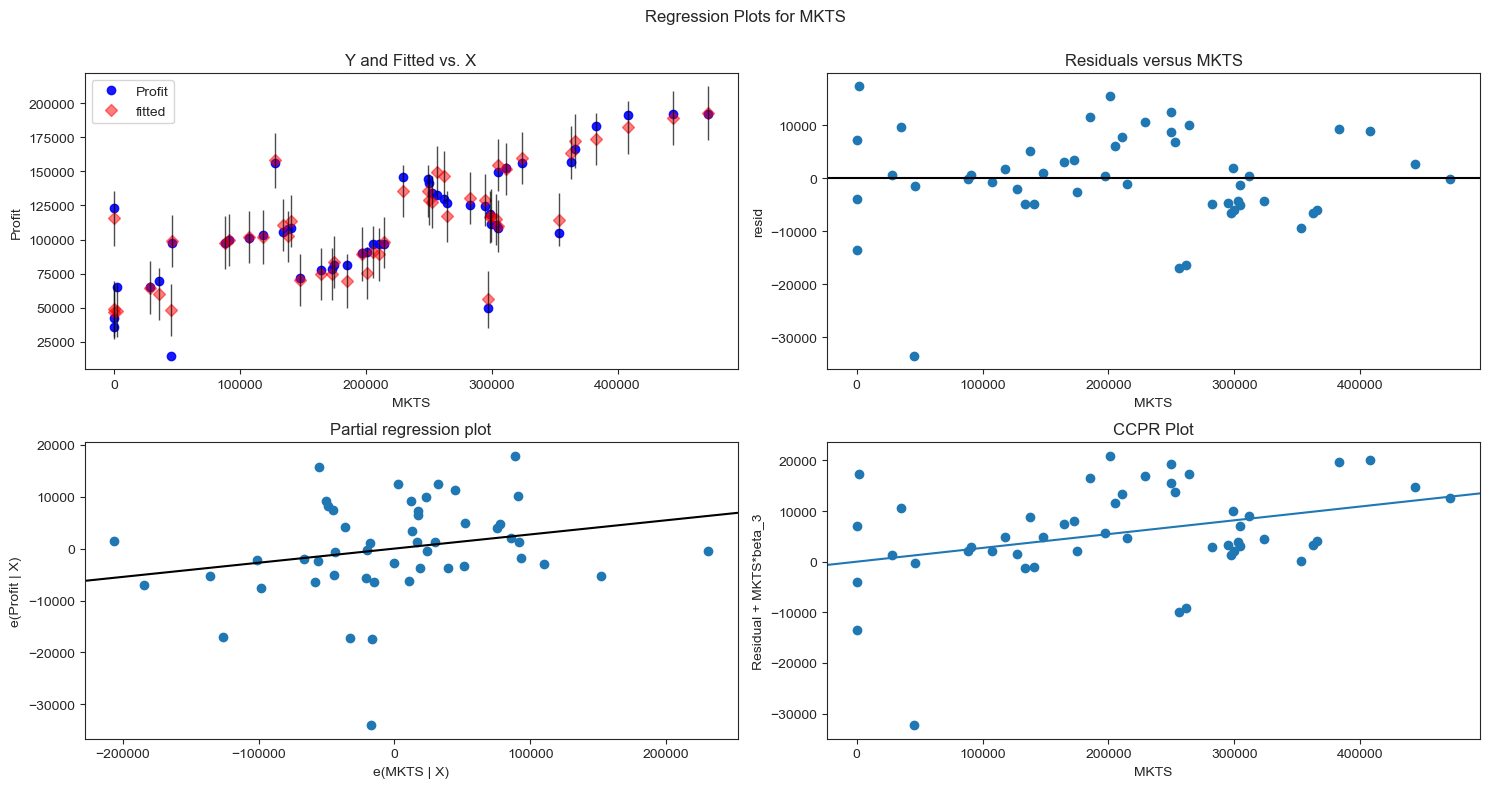

In [104]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model_startup,'MKTS',fig=fig)
plt.show()

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


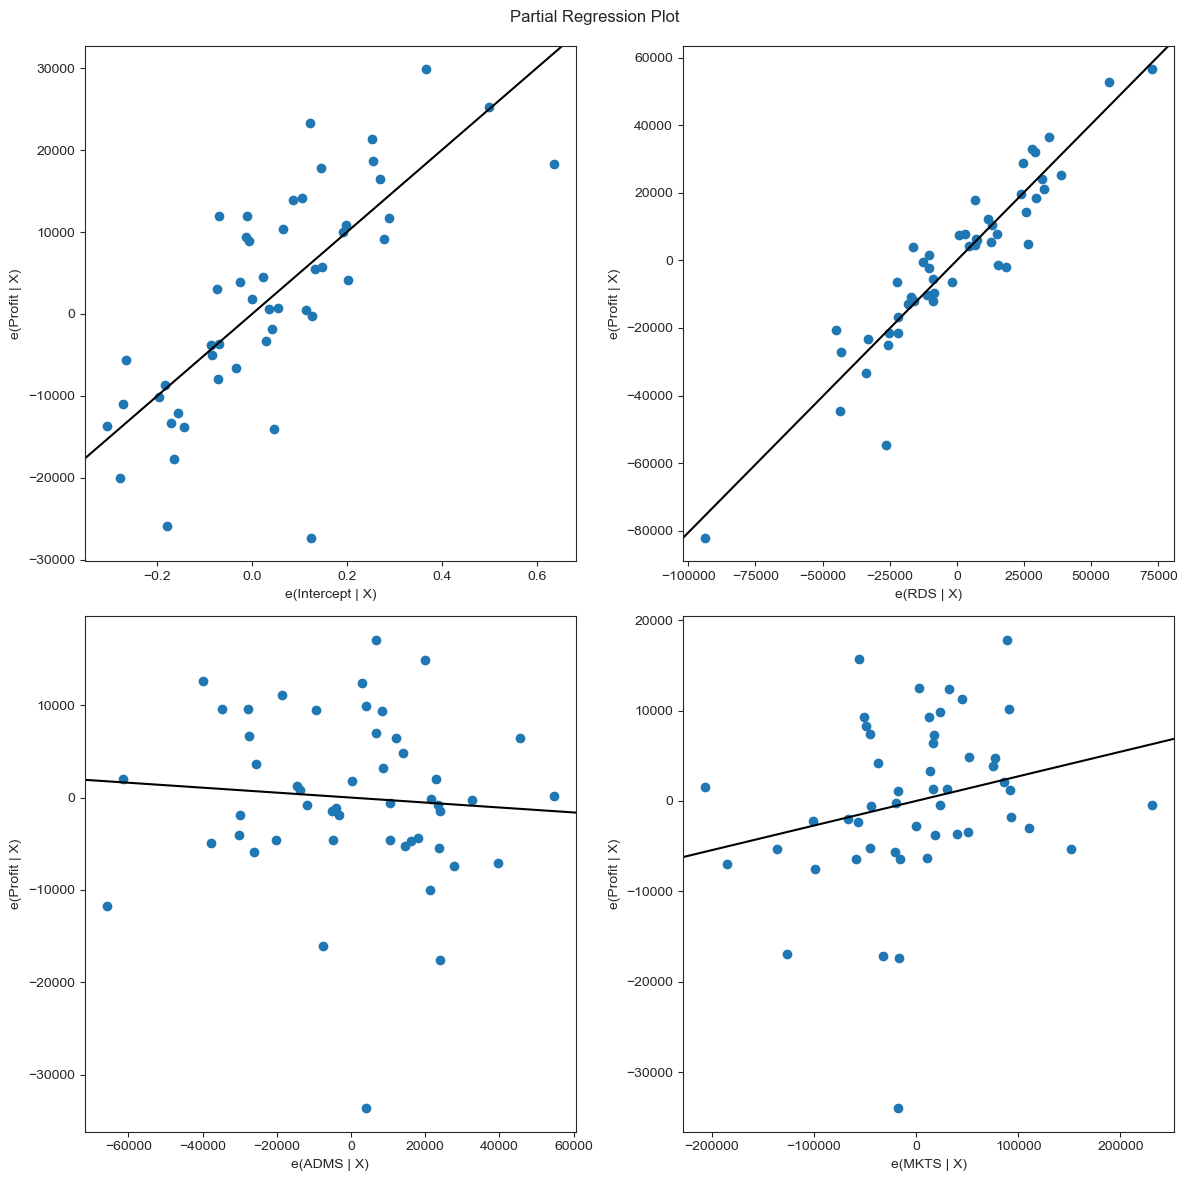

In [105]:
fig = plt.figure(figsize=(12,12))
fig = sm.graphics.plot_partregress_grid(model_startup, fig=fig)

# Model Deletion Diagnostics

### checking Outliers or Influencers with Two Techniques: 
### 1. Cook's Distance 


In [106]:
#1. Cook's Distance: If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance
(c_s,_)=model_startup.get_influence().cooks_distance
c_s

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

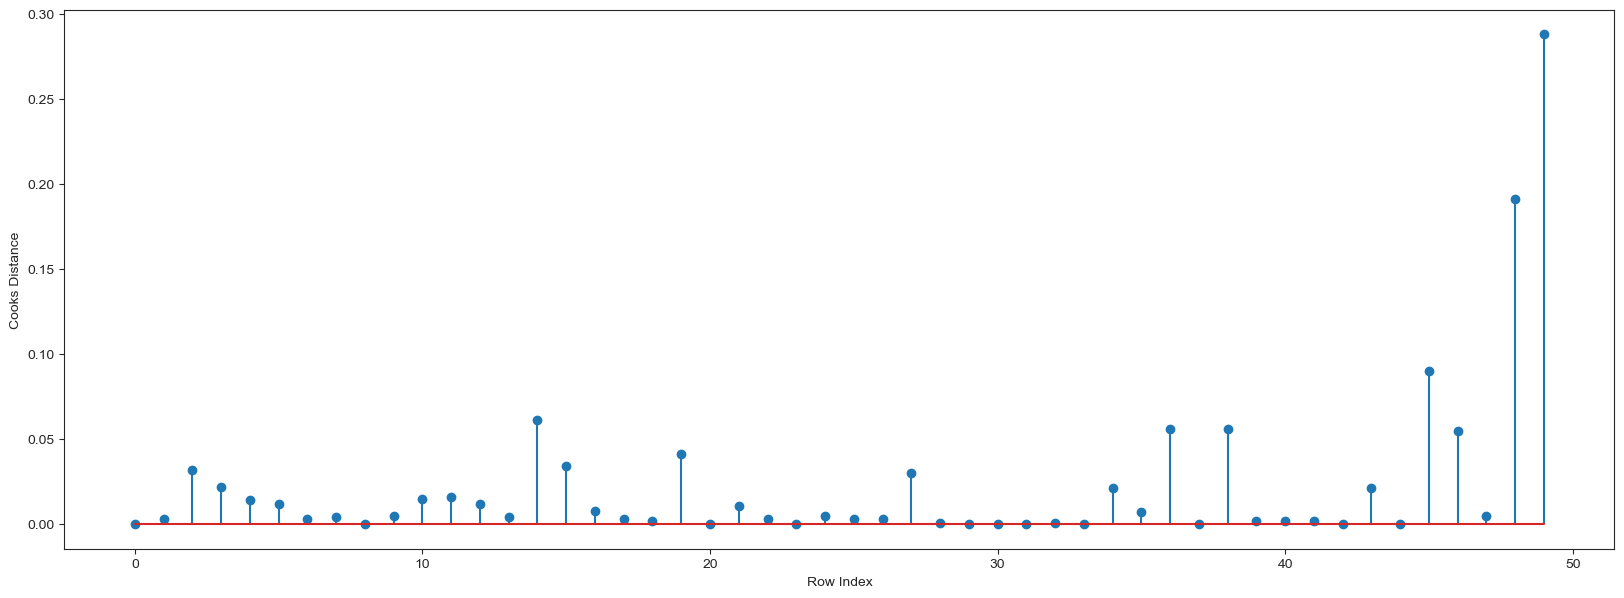

In [107]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(startups1)),np.round(c_s,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [108]:
# Index and value of influencer where C>0.5
np.argmax(c_s) , np.max(c_s)

(49, 0.28808229275432634)

* as per cook,s distance there are outliers present in the data set.
but to find more evidence we are using second technique and that is Leverage Value.

### 2. Leverage value

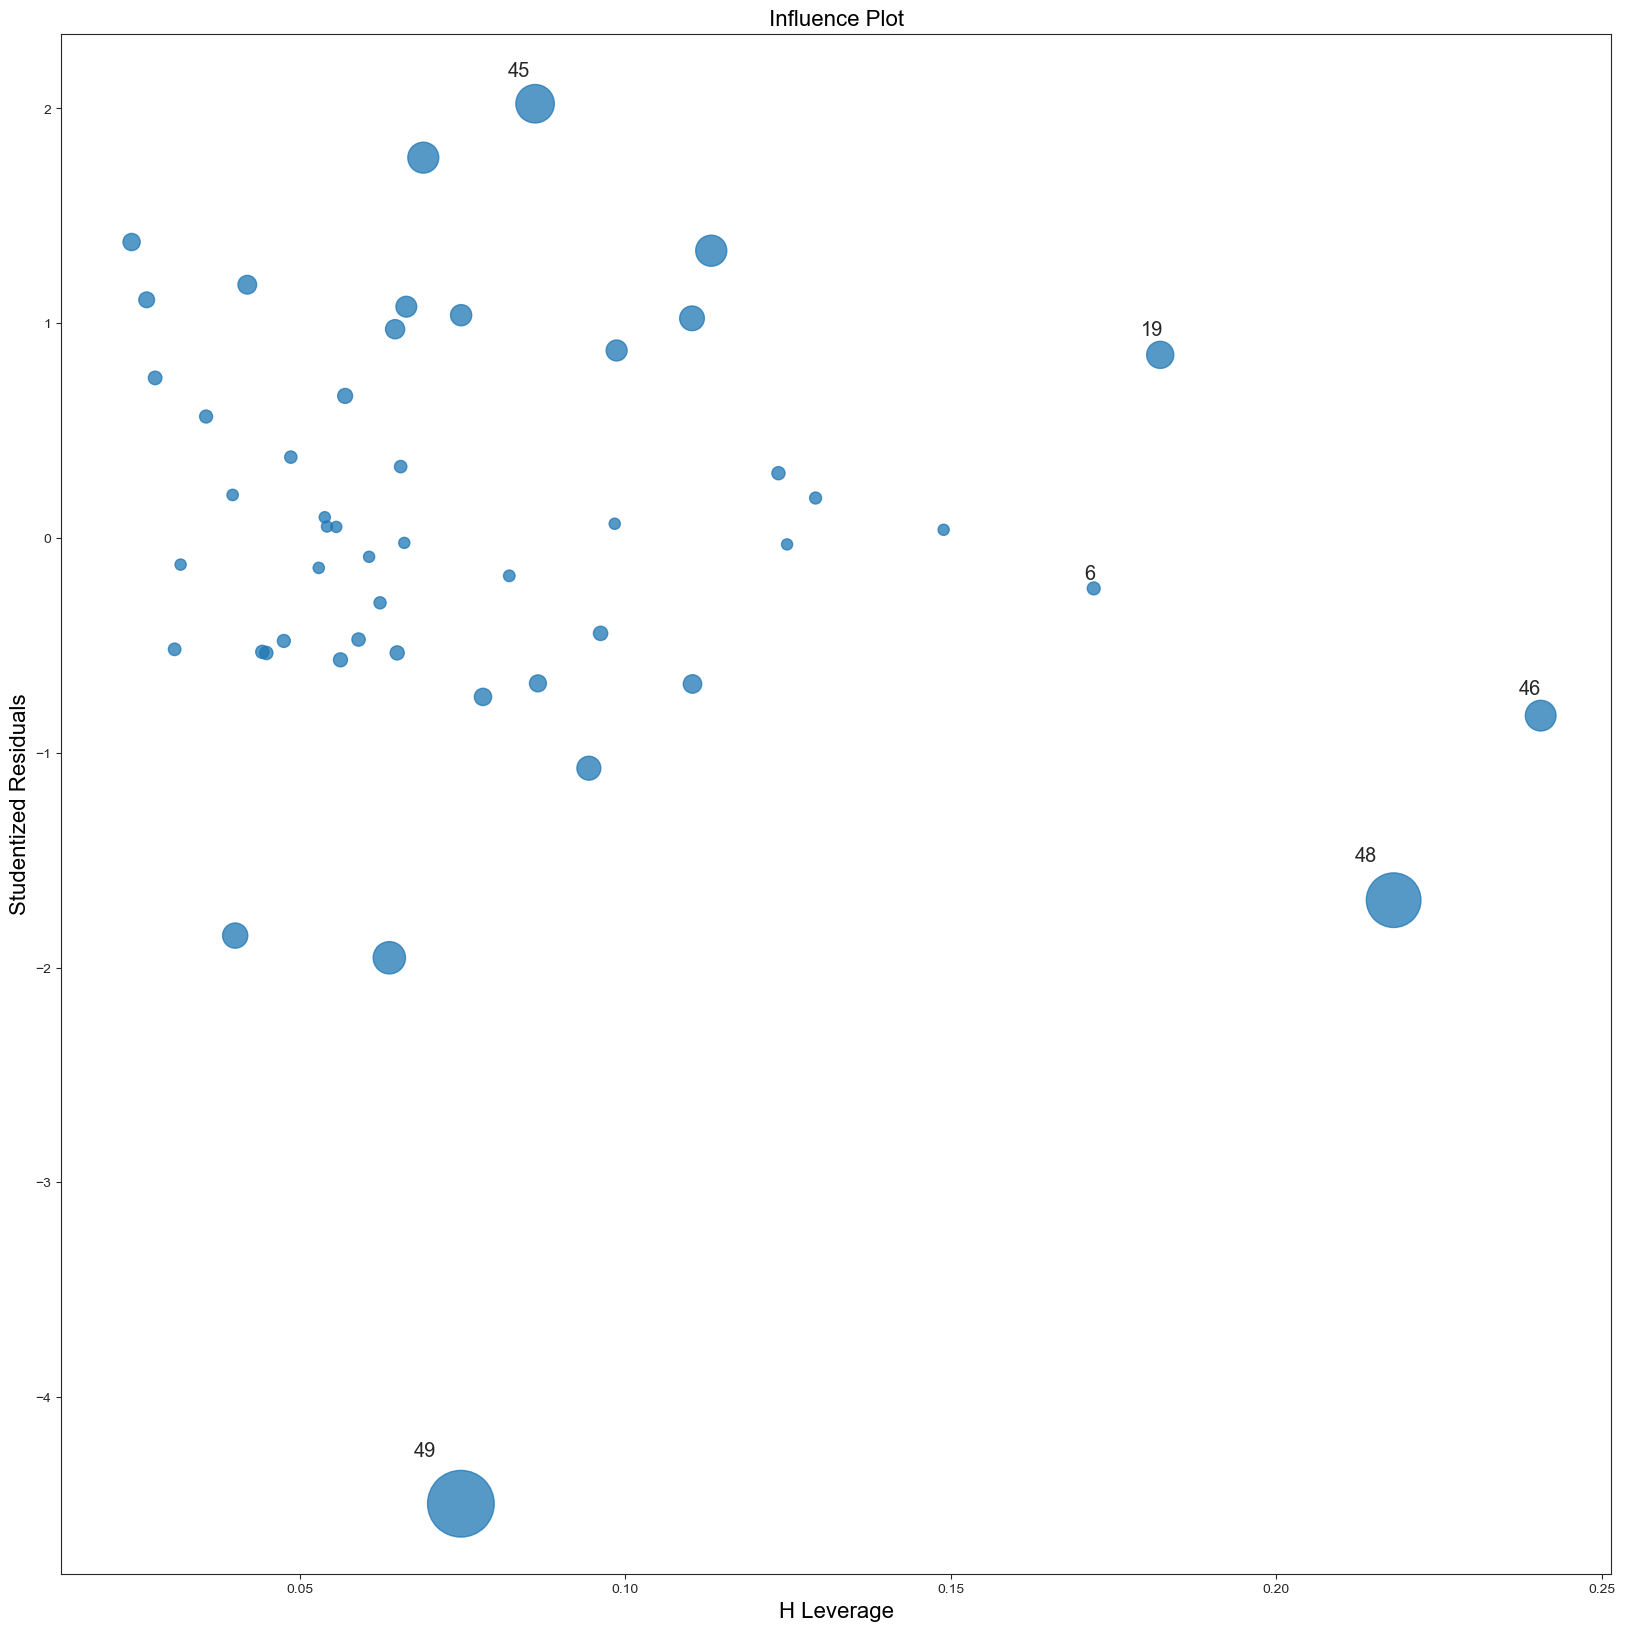

In [109]:
# 2. Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
fig,ax=plt.subplots(figsize=(20,20))
fig=influence_plot(model_startup,ax = ax)

In [110]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=startups1.shape[1]
n=startups1.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.36

In [111]:
startups1[startups1.index.isin([49])] 

,RDS,ADMS,MKTS,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


# Improving the Model

In [112]:
# Creating a copy of data so that original dataset is not affected
startups1_new=startups1.copy()
startups1_new.head()

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [113]:
startups1_new.shape

(50, 5)

In [114]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
startups1_new1=startups1_new.drop(startups1_new.index[[49]],axis=0).reset_index(drop=True)
startups1_new1

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [115]:
startups1_new1.shape

(49, 5)

# Model Deletion Diagnostics and Final Model

In [116]:
 while np.max(c)>0.5 :
    model_startup=smf.ols("Profit~RDS+ADMS+MKTS",data=startups1_new1).fit()
    (c_s,_)=model_startup.get_influence().cooks_distance
    c_s
    np.argmax(c_s) , np.max(c_s)
    startups1_new1=startups1_new1.drop(startups1_new1.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    startups1_new1
else:
    final_model_s=smf.ols("Profit~RDS+ADMS+MKTS",data=startups1_new1).fit()
    final_model_s.rsquared , final_model_s.aic
    print("Thus model accuracy is improved to",final_model_s.rsquared)

Thus model accuracy is improved to 0.9613162435129847


In [117]:
print("accuracy is: ",final_model_s.rsquared)

accuracy is:  0.9613162435129847


In [118]:
startups1_new1.head()

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Model Predictions

In [119]:
new_test = pd.DataFrame({"RDS","ADMS", "MKTS","State","Profit"})

In [120]:
new_test = pd.DataFrame({"RDS":140000.30,"ADMS":113423.70, "MKTS":147737.65},index=[0])
new_test

,RDS,ADMS,MKTS
0,140000.3,113423.7,147737.65


In [121]:

final_model_s.predict(new_test)

0    163212.731444
dtype: float64

In [122]:
# Automatic Prediction of Price with 96% accurcy
pred_s=final_model_s.predict(startups1_new1)
pred_s

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

In [123]:
pred_prof= pd.DataFrame()
pred_prof = startups1_new1
pred_prof['predicted_profit'] = pred_s

In [124]:
pred_prof

,RDS,ADMS,MKTS,State,Profit,predicted_profit
0,165349.20,136897.80,471784.10,New York,192261.83,190716.676999
1,162597.70,151377.59,443898.53,California,191792.06,187537.122227
2,153441.51,101145.55,407934.54,Florida,191050.39,180575.526396
3,144372.41,118671.85,383199.62,New York,182901.99,172461.144642
4,142107.34,91391.77,366168.42,Florida,166187.94,170863.486721
5,131876.90,99814.71,362861.36,New York,156991.12,162582.583177
6,134615.46,147198.87,127716.82,California,156122.51,157741.338633
7,130298.13,145530.06,323876.68,Florida,155752.60,159347.735318
8,120542.52,148718.95,311613.29,New York,152211.77,151328.826941
9,123334.88,108679.17,304981.62,California,149759.96,154236.846778


# R^2 value for each prepared model

In [126]:
df2={'Model_names':['m1','m2'],'R_squared':[model_startup.rsquared,final_model_s.rsquared]}
R_2=pd.DataFrame(df2)
R_2 

,Model_names,R_squared
0,m1,0.950746
1,m2,0.961316
